# Исследование заведений общественного питания Москвы

Исследование заведений общественного питания в Москве проводится по заказу инвесторов из фонда "Shut and Take My Money", которые на базе данных, полученных в результате исследования, планируют рассмотреть вопрос об открытии заведения общественного питания в Москве.

# Оглавление

1. [Загузка данных и изучение общей информации](#start)

2. [Предобработка данных](#preprocessing)

3. [Анализ данных](#analysis)

   3.1 [Исследование объектов общественного питания по категориям](#category)
   
   3.2 [Исследование количества посадочных мест по категориям](#seats)
   
   3.3 [Соотношение сетевых и несетевых заведений](#chain)
   
   3.4 [Какие категории заведений чаще являются сетевыми](#category_chain)
   
   3.5 [Исследование наиболее популярных сетей Москвы](#top_chain)
   
   3.6 [Анализ заведений по административным районам Москвы](#district)
   
   3.7 [Распределение средних рейтингов по категориям заведений](#rating)
   
   3.8 [Фоновая картограмма со средним рейтингом заведений районов Москвы](#rating_Choropleth)
   
   3.9 [Отображение всех заведений на карте с помощью кластеров](#claster)
   
   3.10 [Анализ топ-15 улиц по количеству заведений](#top_street)
   
   3.11 [Улицы, на которых находится только один объект общепита](#one_object)
   
   3.12 [Анализ средних чеков заведений](#avg_bill)
   
   3.13 [Анализ зависимости часов работы заведений от расположения и категории заведения](#hours)
   
4. [Исследование на предмет открытия кофейни](#coffee_house)

   4.1 [В каких районах расположены кофейни и особенности их расположения](#district_coffee_house)
   
   4.2 [Исследование кофеен, работающих круглосуточно](#hours_all_day)
   
   4.3 [Рейтинги кофеен, распределение их по районам](#rating_coffee_house)
   
   4.4 [Анализ стоимости чашки капучино в кофейнях](#middle_coffee_cup)
   

<a id='start'>
1. Загрузка данных и изучение общей информации
</a>

***Описание данных:***

Файл moscow_places.csv:

•	name — название заведения;

•	address — адрес заведения;

•	category — категория заведения;

•	hours — информация о днях и часах работы;

•	lat — широта географической точки, в которой находится заведение;

•	lng — долгота географической точки, в которой находится заведение;

•	rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);

•	price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;

•	avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;

•	middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;

•	middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»;

•	chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;

•	district — административный район, в котором находится заведение, например Центральный административный округ;

•	seats — количество посадочных мест.


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
import re
import json
#import folium
#from folium import Marker, Map
import plotly.io as pio
from plotly.offline import init_notebook_mode, iplot
#pio.renderers.default="notebook"
#svg_renderer = pio.renderers["notebook"]
#from plotly.offline import init_notebook_mode, iplot
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
import plotly.express as px
from plotly import graph_objects as go

Загружаем данные о заведениях общественного питания Москвы.

In [2]:
try:
    data=pd.read_csv('moscow_places.csv', sep=',')
except:
    data=pd.read_csv('/datasets/moscow_places.csv', sep=',')

In [3]:
#data=pd.read_csv('/datasets/moscow_places.csv', sep=',')
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


Выводим названия столбцов датафрейма.

In [4]:
data.columns

Index(['name', 'category', 'address', 'district', 'hours', 'lat', 'lng',
       'rating', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup',
       'chain', 'seats'],
      dtype='object')

Смотрим информацию столбцов датафрейма.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


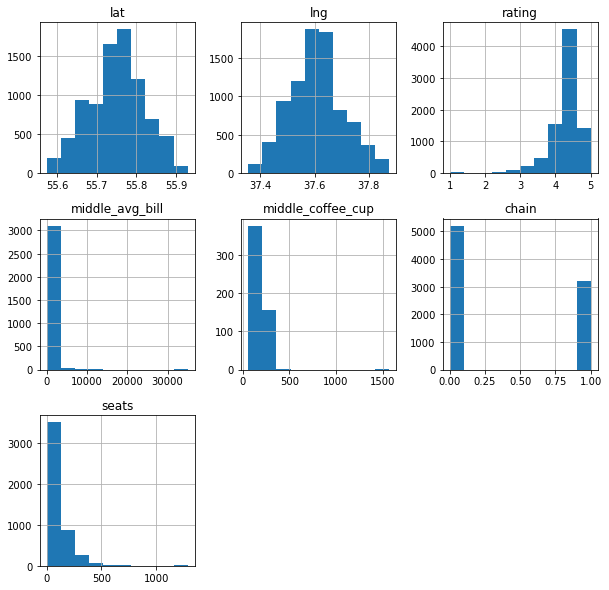

In [6]:
data.hist(figsize=(10,10));

In [7]:
data.describe()

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,8406.000000,8406.000000,8406.000000,3149.000000,535.000000,8406.000000,4795.000000
mean,55.750109,37.608570,4.229895,958.053668,174.721495,0.381275,108.421689
std,0.069658,0.098597,0.470348,1009.732845,88.951103,0.485729,122.833396
min,55.573942,37.355651,1.000000,0.000000,60.000000,0.000000,0.000000
25%,55.705155,37.538583,4.100000,375.000000,124.500000,0.000000,40.000000
50%,55.753425,37.605246,4.300000,750.000000,169.000000,0.000000,75.000000
75%,55.795041,37.664792,4.400000,1250.000000,225.000000,1.000000,140.000000
max,55.928943,37.874466,5.000000,35000.000000,1568.000000,1.000000,1288.000000


**Вывод:**

***Всего файл содержит 8406 записей по объектам общественного питания Москвы, 14 столбцов признаков (7 количественных, 7 категориальных). Для части столбцов видим наличие пропущенных значений.***


<a id='preprocessing'>
2. Предобработка данных
</a>

Проверяем на наличие пропусков.

In [8]:
data.isnull().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
category,0.000000
address,0.000000
district,0.000000
hours,6.400000
lat,0.000000
lng,0.000000
rating,0.000000
price,60.600000
avg_bill,54.600000


Имеются пропуски: в столбце hours пропущено 536 значений (6.4%), price - 5091 (60.6%), avg_bill - 4590 (54.6%), middle_avg_bill - 5257 (62.5%), middle_coffee_cup - 7871 (93.6%), seats - 3611 (43%).

In [10]:
def nan_ratio (column):
    return  print('Пропущено {:.1%}'.format(data[column].isna().value_counts()[1]/len(data),2) +  'значений')

Рассмотрим пропуски в столбце seats -количество посадочных мест. 

In [11]:
data['seats'].isnull().sum()

3611

In [12]:
nan_ratio('seats')

Пропущено 43.0%значений


In [13]:
data['seats'].value_counts()

40.0     253
100.0    213
60.0     175
50.0     168
80.0     160
        ... 
161.0      1
430.0      1
131.0      1
760.0      1
305.0      1
Name: seats, Length: 229, dtype: int64

Пропуски в столбце seats составляют 3611 значений или 43%. Возможно, внесение данной информации не являлось обязательным при заполнении данных по объектам, также отсутствие части данных может носить объективный характер, так как часть заведений общественного питания догут не иметь на своих площадях посадочных мест. Пропущенные значения по количеству посадочных мест оставляем незаполненными, так как нет возможности заполнить их корректными значениями.

Рассмотрим пропуски в столбце hours -информация о днях и часах работы.

In [14]:
data['hours'].isnull().sum()

536

In [15]:
nan_ratio('hours')

Пропущено 6.4%значений


Имеются пропуски 536 значений (6.4%).

In [16]:
data['hours'].value_counts()

ежедневно, 10:00–22:00                                                  759
ежедневно, круглосуточно                                                730
ежедневно, 11:00–23:00                                                  396
ежедневно, 10:00–23:00                                                  310
ежедневно, 12:00–00:00                                                  254
                                                                       ... 
пн-пт 17:00–03:00; сб,вс 17:00–05:00                                      1
пн,вт 09:00–21:00; ср-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00      1
пн-пт 12:00–01:00                                                         1
пн-пт 10:30–21:30; сб,вс 10:30–22:30                                      1
пн-сб 10:30–21:30                                                         1
Name: hours, Length: 1307, dtype: int64

Создаем дополнительный столбец is_24/7 с обозначением, где заведение работает ежедневно и круглосуточно (24/7).

In [17]:
data['hours']=data['hours'].astype('str')
def hours_(row):
    try:
        if 'ежедневно, круглосуточно' in row:
            return True
        elif 'ежедневно, круглосуточно' not in row:
            return False
        
    except:
        pass

In [18]:
data['is_24/7'] = data['hours'].apply(hours_)

In [19]:
data['is_24/7'].value_counts()

False    7676
True      730
Name: is_24/7, dtype: int64

Количество заведений общественного питания, которые работают ежедневно и круглосуточно, составляет 730 или 8.68% от общего числа рассматриваемых объектов.

In [20]:
data['is_24/7']

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24/7, Length: 8406, dtype: bool

Количество пропусков в столбце hours - информация о днях и часах работы составляет 536 значений (6.4%). Возможно, пропуски связаны с человеческим фактором -эти данные могли быть не обязательны для заполнения. Оставляем пропущенные значения незаполненными, так как нет возможности заполнить их корректными значениями.

Рассмотрим данные столбца price -категория цен в заведении.

In [21]:
data['price'].isnull().sum()

5091

In [22]:
nan_ratio('price')

Пропущено 60.6%значений


Пропуски составляют 5091 значений (60.6%).

In [23]:
data['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [24]:
data.groupby('price')['middle_avg_bill'].agg('median')

price
высокие          2000.0
выше среднего    1250.0
низкие            180.0
средние           500.0
Name: middle_avg_bill, dtype: float64

Пропуски данных в столбце price категория цен в заведении составляют 5091 значения или 60.6%. Категории цен в столбце - высокие, выше среднего, низкие и средние. Значения столбца price формируются на основании значений столбца avg_bill - средняя стоимость заказа в виде диапазона, в котором также имеется большое количество пропущенных значений. Также возможен технический сбой. Пропуски оставляем незаполненными, так как нет возможности заполнить их корректными данными.

Рассмотрим пропуски в столбце avg_bill - средняя стоимость заказа.

In [25]:
data['avg_bill'].isnull().sum()

4590

In [26]:
nan_ratio('avg_bill')

Пропущено 54.6%значений


В столбце пропущено 4590 значений или 54.6%.

In [27]:
data['avg_bill'].unique()

array([nan, 'Средний счёт:1500–1600 ₽', 'Средний счёт:от 1000 ₽',
       'Цена чашки капучино:155–185 ₽', 'Средний счёт:400–600 ₽',
       'Средний счёт:199 ₽', 'Средний счёт:200–300 ₽',
       'Средний счёт:от 500 ₽', 'Средний счёт:1000–1200 ₽',
       'Цена бокала пива:250–350 ₽', 'Средний счёт:330 ₽',
       'Средний счёт:1500 ₽', 'Средний счёт:300–500 ₽',
       'Средний счёт:140–350 ₽', 'Средний счёт:350–500 ₽',
       'Средний счёт:300–1500 ₽', 'Средний счёт:от 240 ₽',
       'Средний счёт:200–250 ₽', 'Средний счёт:328 ₽',
       'Средний счёт:300 ₽', 'Средний счёт:от 345 ₽',
       'Средний счёт:60–400 ₽', 'Средний счёт:900 ₽',
       'Средний счёт:500–800 ₽', 'Средний счёт:500–1000 ₽',
       'Средний счёт:600–700 ₽', 'Цена бокала пива:120–350 ₽',
       'Средний счёт:1000–1500 ₽', 'Средний счёт:1500–2000 ₽',
       'Цена чашки капучино:150–190 ₽', 'Средний счёт:2000–2500 ₽',
       'Средний счёт:600 ₽', 'Средний счёт:450 ₽',
       'Цена чашки капучино:120–170 ₽', 'Средний счё

In [28]:
data['avg_bill'].value_counts()

Средний счёт:1000–1500 ₽        241
Средний счёт:1500–2000 ₽        120
Средний счёт:300–500 ₽           90
Средний счёт:500–1000 ₽          78
Средний счёт:1500–2500 ₽         68
                               ... 
Цена бокала пива:180–260 ₽        1
Средний счёт:407 ₽                1
Средний счёт:170–490 ₽            1
Цена бокала пива:90–250 ₽         1
Цена чашки капучино:80–120 ₽      1
Name: avg_bill, Length: 897, dtype: int64

In [29]:
len(data['avg_bill'].value_counts())

897

В данных столбца avg_bill - средняя стоимость заказа было пропущено 4590 или 54.6% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или не посчитали данный параметр важным и обязательным для заполнения. Также мог иметь место технический сбой.

Пропущенные значения средней стоимости заказа оставляем незаполненные, так как нет возможности заполнить их корректными данными.

Рассмотрим пропуски в столбце middle_avg_bill -число с оценкой среднего чека.

In [30]:
data['middle_avg_bill'].isnull().sum()

5257

In [31]:
nan_ratio('middle_avg_bill')

Пропущено 62.5%значений


Пропущено 5257 значений или 62.5%.

In [32]:
data['middle_avg_bill'].value_counts()

1250.0    247
1000.0    175
300.0     148
1500.0    146
400.0     134
         ... 
383.0       1
255.0       1
67.0        1
495.0       1
107.0       1
Name: middle_avg_bill, Length: 230, dtype: int64

Пропуски в столбце middle_avg_bill- число с оценкой среднего чека, составляет 5257 значений или 62.5%. Данный столбец формируется только для значений из столбца avg_bill, начинающихся с подстроки "Средний счет". Пропущенные значения оставляем незаполненными, так как нет возможности заполнить их корректными значениями.

Рассмотрим пропуски в столбце middle_coffee_cup -число с оценкой стоимости одной чашки капучино.

In [33]:
data['middle_coffee_cup'].isnull().sum()

7871

In [34]:
nan_ratio('middle_coffee_cup')

Пропущено 93.6%значений


In [35]:
data['middle_coffee_cup'].value_counts()

256.0    43
60.0     33
95.0     32
150.0    24
170.0    18
         ..
137.0     1
315.0     1
167.0     1
169.0     1
129.0     1
Name: middle_coffee_cup, Length: 96, dtype: int64

В столбце middle_coffee_cup - число с оценкой стоимости одной чашки капучино пропущено 7871 значений или 93.6%. Значения в данном столбце указаны только для значений столбца avg_bill, начинающихся с подстроки "Цена одной чашки капучино". Пропущенные значения оставляем незаполненными, так как нет возможности заполнить их корректно.

Проведем проверку на наличие явных дубликатов.

In [36]:
data.duplicated().sum()

0

Явных дубликтов не обнаружено.

Проверим на наличие неявных дубликатов и выбивающихся значений.

In [37]:
data['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6])

В столбце name -название заведения производим завену названия 'Яндекс.Лавка'на'Яндекс Лавка'. Это название встречается 72 раза, поэтому приведение к единому написанию названия заведения актуально для дальнейшего исследования.

In [38]:
data['name']=data['name'].replace('Яндекс.Лавка','Яндекс Лавка')

In [39]:
data['name'].value_counts()

Кафе              189
Шоколадница       120
Домино'с Пицца     76
Додо Пицца         74
Яндекс Лавка       72
                 ... 
Сащя                1
Мой дом             1
Stardogs            1
Bar Park 15         1
Kebab Time          1
Name: name, Length: 5613, dtype: int64

In [40]:
data['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [41]:
len(data['category'].value_counts())

8

In [42]:
data['address'].value_counts()

Москва, проспект Вернадского, 86В                                                                      28
Москва, Усачёва улица, 26                                                                              26
Москва, площадь Киевского Вокзала, 2                                                                   20
Москва, Ярцевская улица, 19                                                                            20
Москва, Каширское шоссе, 61Г                                                                           16
                                                                                                       ..
Москва, улица Герасима Курина, 6                                                                        1
Москва, Кутузовский проспект, 36, стр. 5                                                                1
Москва, улица Мнёвники, 11                                                                              1
Москва, Западный административный округ, район

В столбце address -адрес заведения, есть адреса, которые встречаются больше, чем один раз. На примере среза по адресу с наибольшим количеством повторений, посмотрим на полученные данные.

In [43]:
data[(data.address=='Москва, проспект Вернадского, 86В')]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7
6531,Паrk фудхолл,"бар,паб","Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",55.661639,37.480197,4.6,NaN,NaN,NaN,NaN,0,NaN,False
6532,I Need Doner,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 10:00...",55.661559,37.479887,4.9,NaN,Средний счёт:400–700 ₽,550.0,NaN,1,NaN,False
6534,Fibo Pasta & Ravioli,кафе,"Москва, проспект Вернадского, 86В",Западный административный округ,пн-сб 10:00–22:00; вс 11:00–22:00,55.661638,37.480148,4.8,средние,Средний счёт:500–1000 ₽,750.0,NaN,1,NaN,False
6547,Сыроварня,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"ежедневно, 11:00–23:00",55.661718,37.479907,4.5,высокие,Средний счёт:2000–2500 ₽,2250.0,NaN,1,NaN,False
6549,Bổ,кафе,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",55.661638,37.480148,4.7,NaN,NaN,NaN,NaN,0,NaN,False
6568,Aly’s Poke,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",55.661776,37.480123,4.6,средние,Средний счёт:390–660 ₽,525.0,NaN,0,NaN,False
6584,Курица и Утка по-Гонконгски,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"ежедневно, 11:00–23:00",55.661598,37.480319,4.3,NaN,NaN,NaN,NaN,0,NaN,False
6597,Асса Food,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",55.661783,37.480264,4.3,NaN,NaN,NaN,NaN,0,NaN,False
6604,Shrimp Kitchen,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",55.661768,37.480026,4.4,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,0,NaN,False
6630,Мясоед,ресторан,"Москва, проспект Вернадского, 86В",Западный административный округ,"пн-чт 10:00–23:00; пт,сб 10:00–00:00; вс 11:00...",55.661762,37.480336,4.2,NaN,NaN,NaN,NaN,0,NaN,False


На срезе по рассматриваемому адресу видно, что там расположено 28 заведений общественного питания, которые разные названия, категории, часы работы и др., т.е. дубликатами не являются.

Добавляем в датафрейм столбец street с названиями улиц из столбца с адресом.

In [44]:
data['address']=data['address'].astype('str')
def street(row, genre_index):
    array_address=row['address'].split(',')
    if len(array_address)==1:
        return ''
    else:
        return array_address[1]
    
data['street']=data.apply(lambda row: street(row,1),axis=1)

In [45]:
data['street'].value_counts()

 проспект Мира                 184
 Профсоюзная улица             122
 проспект Вернадского          108
 Ленинский проспект            107
 Ленинградский проспект         95
                              ... 
 улица Маршала Соколовского      1
 Малый Казённый переулок         1
 улица Максимова                 1
 Басманный тупик                 1
 Чонгарский бульвар              1
Name: street, Length: 1448, dtype: int64

In [46]:
data['chain'].unique()

array([0, 1], dtype=int64)

In [47]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [48]:
data['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             900
Южный административный округ                892
Северо-Восточный административный округ     891
Западный административный округ             851
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [49]:
len(data['district'].value_counts())

9

In [50]:
data['lat'].unique()

array([55.878494, 55.875801, 55.889146, ..., 55.648859, 55.648849,
       55.598229])

In [51]:
data['lat'].describe()

count    8406.000000
mean       55.750109
std         0.069658
min        55.573942
25%        55.705155
50%        55.753425
75%        55.795041
max        55.928943
Name: lat, dtype: float64

In [52]:
data['lng'].unique()

array([37.47886 , 37.484479, 37.525901, ..., 37.743219, 37.743222,
       37.604702])

In [53]:
data['lng'].describe()

count    8406.000000
mean       37.608570
std         0.098597
min        37.355651
25%        37.538583
50%        37.605246
75%        37.664792
max        37.874466
Name: lng, dtype: float64

****Выводы:****

**Количество посадочных мест:**
*Пропуски в столбце seats составляют 3611 значений или 43%. Возможно, внесение данной информации не являлось обязательным при заполнении данных по объектам, также отсутствие части данных может носить объективный характер, так как часть заведений общественного питания догут не иметь на своих площадях посадочных мест. Пропущенные значения по количеству посадочных мест оставляем незаполненными, так как нет возможности заполнить их корректными значениями.*

**Информация о днях и часах работы:**
*Количество пропусков в столбце hours - информация о днях и часах работы составляет 536 значений (6.4%). Возможно, пропуски связаны с человеческим фактором -эти данные могли быть не обязательны для заполнения. Оставляем пропущенные значения незаполненными, так как нет возможности заполнить их корректными значениями.*

**Категория цен:**
*Пропуски данных в столбце price категория цен в заведении составляют 5091 значения или 60.6%. Категории цен в столбце - высокие, выше среднего, низкие и средние. Значения столбца price формируются на основании значений столбца avg_bill - средняя стоимость заказа в виде диапазона, в котором также имеется большое количество пропущенных значений. Также возможен технический сбой. Пропуски оставляем незаполненными, так как нет возможности заполнить их корректными данными.*

**Средняя стоимость заказа:**
*В данных столбца avg_bill - средняя стоимость заказа было пропущено 4590 или 54.6% значений. Можно предположить, что пропуски связаны с человеческим фактором -не заполнены по невнимательности или не посчитали данный параметр важным и обязательным для заполнения. Также мог иметь место технический сбой. Пропущенные значения средней стоимости заказа оставляем незаполненные, так как нет возможности заполнить их корректными данными.*

**Число с оценкой среднего чека:**
*Пропуски в столбце middle_avg_bill- число с оценкой среднего чека, составляет 5257 значений или 62.5%. Данный столбец формируется только для значений из столбца avg_bill, начинающихся с подстроки "Средний счет". Пропущенные значения оставляем незаполненными, так как нет возможности заполнить их корректными значениями.*

**Число с оценкой стоимости одной чашки капучино:**
*В столбце middle_coffee_cup - число с оценкой стоимости одной чашки капучино пропущено 7871 значений или 93.6%. Значения в данном столбце указаны только для значений столбца avg_bill, начинающихся с подстроки "Цена одной чашки капучино". Пропущенные значения оставляем незаполненными, так как нет возможности заполнить их корректно.*

*Проверены данные на наличие явных дубликатов - явные дубликаты не выявлены.*

*В столбце name -название заведения производим завену названия 'Яндекс.Лавка'на'Яндекс Лавка'. Это название встречается 72 раза, поэтому приведение к единому написанию названия заведения актуально для дальнейшего исследования.*

**Название улиц:**
*Добавили в датафрейм столбец street с названиями улиц из столбца с адресом.*

**Круглосуточно работающие заведения:**
*Создали дополнительный столбец is_24/7 с обозначением, где заведение работает ежедневно и круглосуточно (24/7).*


<a id='analysis'>
3. Анализ данных
</a>

<a id='category'>
3.1 Исследование объектов общественного питания по категориям
</a>   

Рассмотрим категории объектов общественного питания.

In [54]:
data['category'].value_counts()

кафе               2378
ресторан           2043
кофейня            1413
бар,паб             765
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [55]:
category_=data.groupby('category')['name'].agg(['count']).reset_index()
category_.columns=['category','category_count']
category_.sort_values(by='category_count', ascending=False)

,category,category_count
3,кафе,2378
6,ресторан,2043
4,кофейня,1413
0,"бар,паб",765
5,пиццерия,633
2,быстрое питание,603
7,столовая,315
1,булочная,256


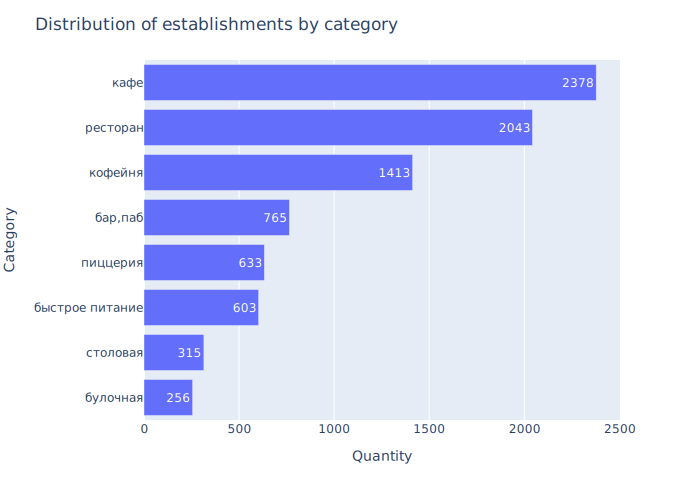

In [56]:

fig = px.bar(category_.sort_values(by='category_count', ascending=True), 
             x='category_count', 
             y='category', 
             text='category_count'                      
            )

fig.update_layout(title='Distribution of establishments by category',
                   xaxis_title='Quantity',
                   yaxis_title='Category')
fig.show("svg") 

In [57]:
category_ = pd.DataFrame()
category_['category_count']=data.groupby('category')['name'].count()
category_['category_perc']=category_['category_count']/8406
category_.sort_values('category_perc', ascending = False)    

,category_count,category_perc
category,,
кафе,2378,0.282893
ресторан,2043,0.243041
кофейня,1413,0.168094
"бар,паб",765,0.091006
пиццерия,633,0.075303
быстрое питание,603,0.071734
столовая,315,0.037473
булочная,256,0.030454


Заведения общественного питания в Москве делятся на 8 категорий - кафе; ресторан; кофейня; бар,паб; пиццерия, быстрое питание, столовая и булочная. Наибольшее количество объектов относится к категории кафе - 2378 заведения или 28.29% от общего числа 8406. К категории ресторан относится 2043 заведения или 24.3%, кофейня - 1413 или 16.8%, бар,паб - 765 или 9.1%, пиццерия -633 или 7.53%, быстрое питание - 603 или 7.17%, столовая - 315 или 3.7%. Наименьшее количество заведений относится к категории булочная и составляет 256 заведений или 3% от общего числа заведений. 

<a id='seats'>
3.2 Исследование количества посадочных мест по категориям
</a>

Рассмотрим данные с количеством посадочных мест.

In [58]:
data['seats'].value_counts()

40.0     253
100.0    213
60.0     175
50.0     168
80.0     160
        ... 
161.0      1
430.0      1
131.0      1
760.0      1
305.0      1
Name: seats, Length: 229, dtype: int64

Чаще всего встречаются заведения с количесвом посадочных мест 40 - 253 объекта, 100 - 213, 60 -175, 50 - 168, 80 - 160.

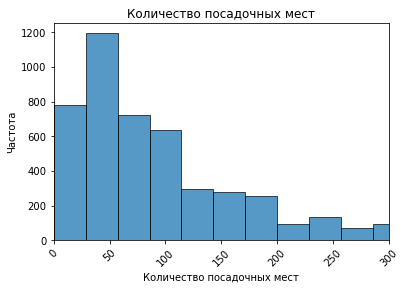

In [59]:
sns.histplot(data['seats'], kde=False, bins=45)
plt.xlim(0,300)
plt.title('Количество посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.xticks(rotation=45)
plt.ylabel('Частота')
plt.show()

Выведем описание данных столбца с количеством посадочных мест.

In [60]:
data['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Минимальное количество посадочных мест -0, максимальное -1288. 

Выведем срез данных, где количество посадочных мест >= 300, где количество посадочных мест =0 и где количество посадочных мест =1288.

In [61]:
data[(data.seats>=300)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
127,Арарат,кафе,"Москва, Дмитровское шоссе, 165, корп. 1",Северо-Восточный административный округ,"ежедневно, 06:00–20:00",55.914310,37.538953,4.2,NaN,NaN,NaN,NaN,1,350.0,False,Дмитровское шоссе
171,One Price Coffee,кофейня,"Москва, Дмитровское шоссе, 163А, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.909838,37.541526,4.0,NaN,NaN,NaN,NaN,1,350.0,False,Дмитровское шоссе
176,Вуди пицца,пиццерия,"Москва, Дмитровское шоссе, 107А, корп. 1",Северный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.878504,37.540110,4.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0,350.0,False,Дмитровское шоссе
194,Ленкорань,кафе,"Москва, Дмитровское шоссе, 165, корп. 1",Северо-Восточный административный округ,"ежедневно, 06:00–20:00",55.914574,37.539103,1.4,NaN,NaN,NaN,NaN,0,350.0,False,Дмитровское шоссе
216,Грузинский бульвар,быстрое питание,"Москва, Дмитровское шоссе, 163А, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.909115,37.540112,4.0,NaN,NaN,NaN,NaN,0,350.0,False,Дмитровское шоссе
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8198,Милти,быстрое питание,"Москва, улица Ленинская Слобода, 19",Южный административный округ,пн-пт 09:00–19:00,55.708303,37.652822,3.8,NaN,NaN,NaN,NaN,0,450.0,False,улица Ленинская Слобода
8220,Шеф Гирос,быстрое питание,"Москва, проспект Андропова, 22",Южный административный округ,"ежедневно, 09:00–22:00",55.682823,37.661115,4.2,NaN,Средний счёт:250–350 ₽,300.0,NaN,0,300.0,False,проспект Андропова
8237,Pasta Cup & Pinsa,пиццерия,"Москва, Автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–22:00",55.704647,37.639556,3.5,средние,Средний счёт:450–700 ₽,575.0,NaN,0,455.0,False,Автозаводская улица
8315,Чайхана Бишкек,ресторан,"Москва, Тихорецкий бульвар, 2, корп. 1",Юго-Восточный административный округ,"ежедневно, 09:00–01:30",55.679190,37.776553,4.1,NaN,NaN,NaN,NaN,0,305.0,False,Тихорецкий бульвар


In [62]:
data[(data.seats==1288)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
6518,DelonixCafe,ресторан,"Москва, проспект Вернадского, 94, корп. 1",Западный административный округ,"ежедневно, круглосуточно",55.652577,37.475730,4.1,высокие,Средний счёт:1500–2000 ₽,1750.0,NaN,0,1288.0,True,проспект Вернадского
6524,Ян Примус,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–02:00; вс 12:00...",55.657166,37.481519,4.5,выше среднего,Средний счёт:1500 ₽,1500.0,NaN,1,1288.0,False,проспект Вернадского
6574,Мюнгер,пиццерия,"Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 08:00–21:00; сб,вс 10:00–21:00",55.667505,37.491001,4.8,NaN,NaN,NaN,NaN,1,1288.0,False,проспект Вернадского
6641,One Price Coffee,кофейня,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,"ежедневно, 08:30–20:00",55.665129,37.478635,4.3,NaN,NaN,NaN,NaN,1,1288.0,False,проспект Вернадского
6658,ГудБар,"бар,паб","Москва, проспект Вернадского, 97, корп. 1",Западный административный округ,"пн-пт 11:00–23:00; сб,вс 13:00–23:00",55.667327,37.490601,4.1,средние,Средний счёт:700 ₽,700.0,NaN,0,1288.0,False,проспект Вернадского
6684,Пивной ресторан,"бар,паб","Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,nan,55.657133,37.481508,4.5,NaN,NaN,NaN,NaN,0,1288.0,False,проспект Вернадского
6690,Японская кухня,ресторан,"Москва, проспект Вернадского, 121, корп. 1",Западный административный округ,nan,55.657255,37.481547,4.4,NaN,NaN,NaN,NaN,1,1288.0,False,проспект Вернадского
6771,Точка,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,nan,55.665634,37.477830,4.7,NaN,NaN,NaN,NaN,1,1288.0,False,проспект Вернадского
6807,Loft-cafe академия,кафе,"Москва, проспект Вернадского, 84, стр. 1",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–16:00,55.665142,37.478603,3.6,NaN,NaN,NaN,NaN,0,1288.0,False,проспект Вернадского
6808,Яндекс Лавка,ресторан,"Москва, проспект Вернадского, 51, стр. 1",Западный административный округ,"ежедневно, круглосуточно",55.672580,37.507753,4.0,NaN,NaN,NaN,NaN,1,1288.0,True,проспект Вернадского


In [63]:
data[(data.seats==0)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
84,Meat Doner Kebab,булочная,"Москва, улица Лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.896987,37.608126,4.5,NaN,Средний счёт:300 ₽,300.0,NaN,0,0.0,True,улица Лескова
177,Арамье,булочная,"Москва, улица 800-летия Москвы, 22, корп. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.879392,37.556832,4.0,NaN,NaN,NaN,NaN,1,0.0,False,улица 800-летия Москвы
196,Донер-Шашлык,ресторан,"Москва, улица Лескова, 22",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.896962,37.608300,4.5,NaN,NaN,NaN,NaN,0,0.0,True,улица Лескова
203,Тандыр № 1,кафе,"Москва, улица Лескова, 22Г",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.895615,37.611049,4.0,NaN,NaN,NaN,NaN,1,0.0,True,улица Лескова
211,Неаполитан пицца,кафе,"Москва, улица Пришвина, 23",Северо-Восточный административный округ,"ежедневно, 12:00–23:00",55.885416,37.604650,4.3,NaN,NaN,NaN,NaN,0,0.0,False,улица Пришвина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,Бико,булочная,"Москва, улица Симоновский Вал, 13, стр. 3",Юго-Восточный административный округ,"ежедневно, 08:00–20:00",55.723340,37.664252,1.3,NaN,NaN,NaN,NaN,0,0.0,False,улица Симоновский Вал
8168,Чайхана УЧ Кудук,кофейня,"Москва, улица Симоновский Вал, 26, корп. 1",Южный административный округ,"ежедневно, 09:00–00:00",55.718663,37.662887,4.3,NaN,NaN,NaN,NaN,0,0.0,False,улица Симоновский Вал
8172,Масса кофе,кофейня,"Москва, Холодильный переулок, 2",Южный административный округ,"пн-пт 08:00–20:00; сб,вс 09:00–20:00",55.709713,37.624388,4.3,средние,Цена чашки капучино:100–210 ₽,NaN,155.0,0,0.0,False,Холодильный переулок
8336,Сочная шаурма в Кузьминках,быстрое питание,"Москва, Волгоградский проспект, 102",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.703834,37.773831,3.9,NaN,Средний счёт:120–130 ₽,125.0,NaN,0,0.0,True,Волгоградский проспект


In [64]:
len(data[(data.seats>=300)|(data.seats==0)])

449

In [65]:
len(data[(data.seats==0)])

136

In [66]:
len(data[(data.seats==1288)])

11

In [67]:
len(data[(data.seats>0)])

4659

Заведения общественного питания, где нет посадочных мест - 136. В основном это булочные, небольшие кафе и кофейни. Заведений с количеством посадочных мест 1288 - 11. Все они расположены на пр. Вернадского.Возможно, при подсчете посадочных мест были посчитаны возможности по приему гостей при проведении фуршетных мероприятий. Заведений с числом посадочных мест более 300 - 449. Скорее всего это большие заведения с несколькими банкетными залами. 

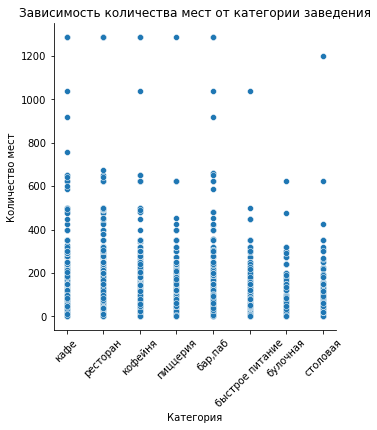

In [68]:
sns.relplot(x='category', y='seats', data=data)
total_area=np.linspace(0,300)
plt.title('Зависимость количества мест от категории заведения')
plt.xlabel('Категория')
plt.xticks(rotation=45)
plt.ylabel('Количество мест')
plt.show()

In [69]:
data.groupby('category').agg({'seats': ['count','mean','median']})
data.pivot_table(columns='category',values='seats',aggfunc=('count','mean','median'))

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
count,468.000000,148.000000,349.000000,1218.000000,751.000000,427.000000,1270.000000,164.00
mean,124.532051,89.385135,98.891117,97.512315,111.199734,94.496487,121.944094,99.75
median,82.500000,50.000000,65.000000,60.000000,80.000000,55.000000,86.000000,75.50


По среднему значению количества посадочных мест лидирует категория бар, паб -125, ресторан -122.

Учитывая, что есть выбросы данных значений количества посадочных мест - 0 и 1288, объективнее рассматривать медианные значения количества посадочных мест по категориям заведений.

Наибольшее количество посадочных мест по медианному значению приходится на категорию рестораны. Среднее значение для данной категории -122 посадочных места, медианное значение - 86, количество объектов данной категории, имеющих посадочные места - 1270. 

Для категории бар, паб среднее значение -125, медианное - 83, количество заведений - 468.

Наименьшее количество посадочных мест - в заведениях категории булочная. Для данной категории среднее значение - 89, медианное -50, количество заведений - 148.

Москва крупный мегаполис с большим количеством жителей и гостей города, поэтому преобладают заведения со средними значениями посадочных мест от 89 до 125 в зависимости от категории, медианные от 50 до 86.

Учитывая, что существуют заведения без посадочных мест и заведения с количеством посадочных мест более 300, видим существенную разницу между средними и медианными значениями.

In [70]:
category_seats=data.groupby('category')['seats'].agg(['count','mean','median']).reset_index()
category_seats.columns=['category','count','seats_mean','seats_median']
category_seats.sort_values(by='seats_median',ascending=False)

,category,count,seats_mean,seats_median
6,ресторан,1270,121.944094,86.0
0,"бар,паб",468,124.532051,82.5
4,кофейня,751,111.199734,80.0
7,столовая,164,99.750000,75.5
2,быстрое питание,349,98.891117,65.0
3,кафе,1218,97.512315,60.0
5,пиццерия,427,94.496487,55.0
1,булочная,148,89.385135,50.0


Cтроим столбчатую диаграмму и оформляем график. Учитывая проведенное ранее исследование, график строим по медианным значениям, которые дают более объективную картину, учитывая большое количество выбросов данных.

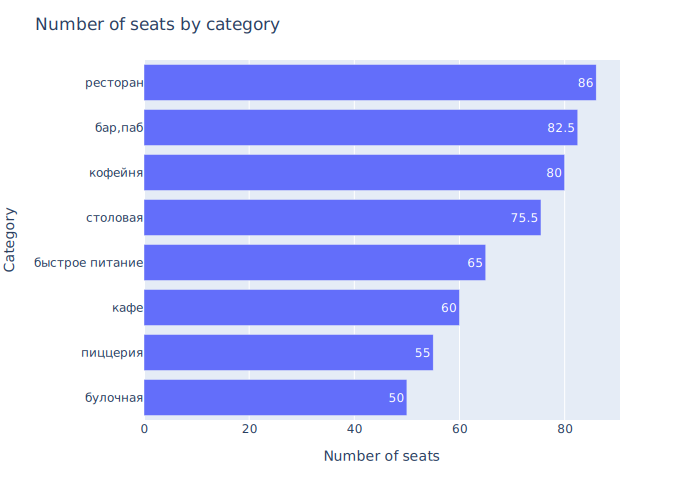

In [71]:

fig = px.bar(category_seats.sort_values(by='seats_median', ascending=True), 
             x='seats_median', 
             y='category', 
             text='seats_median'                      
            )

fig.update_layout(title='Number of seats by category',
                   xaxis_title='Number of seats',
                   yaxis_title='Category')
fig.show() 


<a id='chain'>
3.3 Соотношение сетевых и несетевых заведений
</a>

Рассмотрим сетевые и несетевые заведения.

In [72]:
data['chain'].value_counts()

0    5201
1    3205
Name: chain, dtype: int64

In [73]:
data_chain=data[(data.chain==1)]

In [74]:
data_chain.groupby('name')['name'].count().sort_values().head()

name
1-я Креветочная     1
Бакинский дворик    1
Уйгурский лагман    1
Deli2Go             1
Баку                1
Name: name, dtype: int64

In [75]:
data_chain[data_chain['name'].isin(data_chain['name'].value_counts()[data_chain['name'].value_counts()==1].index)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
133,Крепери,"бар,паб","Москва, улица Лескова, 14",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.897490,37.604722,4.0,NaN,NaN,NaN,NaN,1,NaN,False,улица Лескова
206,Vintage,кафе,"Москва, Дмитровское шоссе, 163Ак1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.908956,37.540036,4.1,NaN,NaN,NaN,NaN,1,NaN,False,Дмитровское шоссе
382,Halal food,кафе,"Москва, Петрозаводская улица, 34",Северный административный округ,"ежедневно, круглосуточно",55.867428,37.489429,4.4,средние,Средний счёт:200–400 ₽,300.0,NaN,1,30.0,True,Петрозаводская улица
613,Wаурма,кафе,"Москва, улица Героев Панфиловцев, 1/2",Северо-Западный административный округ,nan,55.852060,37.438371,4.1,NaN,NaN,NaN,NaN,1,NaN,False,улица Героев Панфиловцев
745,В своей тарелке,столовая,"Москва, Локомотивный проезд, 21",Северный административный округ,nan,55.845414,37.573537,3.9,NaN,NaN,NaN,NaN,1,NaN,False,Локомотивный проезд
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Кофейник,кофейня,"Москва, Михневская улица, 2Д, стр. 4",Южный административный округ,"пн-пт 07:00–21:00; сб,вс 08:00–21:00",55.581907,37.660898,4.1,низкие,Средний счёт:140–142 ₽,141.0,NaN,1,NaN,False,Михневская улица
7874,SUШi,пиццерия,"Москва, Каширское шоссе, 65, корп. 2",Южный административный округ,"пн-пт 11:00–22:15; сб,вс 11:00–23:00",55.600178,37.726182,4.8,NaN,NaN,NaN,NaN,1,100.0,False,Каширское шоссе
7899,Роллофф,кафе,"Москва, Каширское шоссе, 142, корп. 1, стр. 5",Южный административный округ,"пн-чт 11:00–23:00; пт,сб 11:00–23:30; вс 11:00...",55.597524,37.723076,4.1,низкие,Средний счёт:400 ₽,400.0,NaN,1,80.0,False,Каширское шоссе
7905,Easy Pizza,пиццерия,"Москва, Каширское шоссе, 96, корп. 1",Южный административный округ,"ежедневно, 12:00–22:00",55.615059,37.712404,4.4,средние,Средний счёт:от 500 ₽,500.0,NaN,1,350.0,False,Каширское шоссе


In [76]:
data_chain=data_chain[data_chain['name'].isin(data_chain['name'].value_counts()[data_chain['name'].value_counts()>1].index)]

В сгруппированных по сетям данных есть группы, в которые входит только одно заведение. Возможно, это результат технического сбоя или человеческий фактор. Также можно предположить, что в Москве находится только одно заведение сети, и есть еще в других регионах. Значения, где в сеть в рассматриваемом датафрейме входит только одно заведение, удаляем.

In [77]:
data_chain['chain'].value_counts()

1    3141
Name: chain, dtype: int64

Количество сетевых заведений составляет 3141 объектов или 37.4%, несетевых - 5265 или 62.6%.

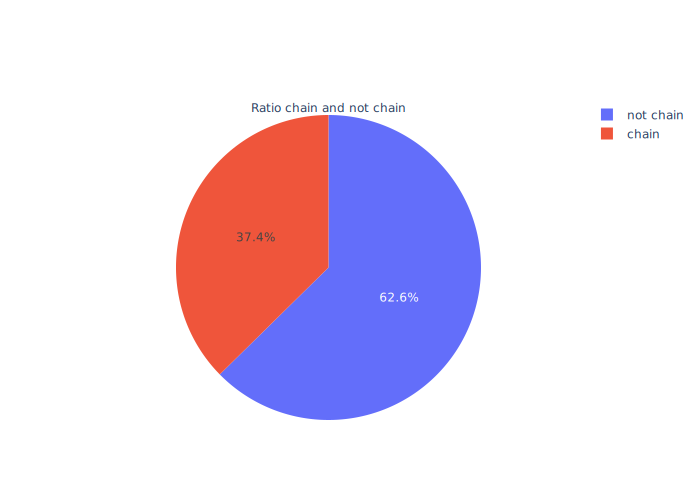

In [78]:
chain_st=['chain', 'not chain']
values=[3141,5265]
fig=go.Figure(data=[ go.Pie(labels=chain_st, values=values,title='Ratio chain and not chain')])
fig.show()

<a id='category_chain'>
3.4 Какие категории заведений чаще являются сетевыми
</a>

Выделим только сетевые заведения.

In [79]:
data_chain['category'].value_counts()

кафе               749
ресторан           721
кофейня            714
пиццерия           325
быстрое питание    227
бар,паб            164
булочная           156
столовая            85
Name: category, dtype: int64

In [80]:
data_chain['chain'].count()

3141

In [81]:
category_chain_=data_chain.groupby('category')['chain'].agg(['count']).reset_index()
category_chain_.columns=['category','chain_count']
category_chain_.sort_values(by='chain_count', ascending=False)

,category,chain_count
3,кафе,749
6,ресторан,721
4,кофейня,714
5,пиццерия,325
2,быстрое питание,227
0,"бар,паб",164
1,булочная,156
7,столовая,85


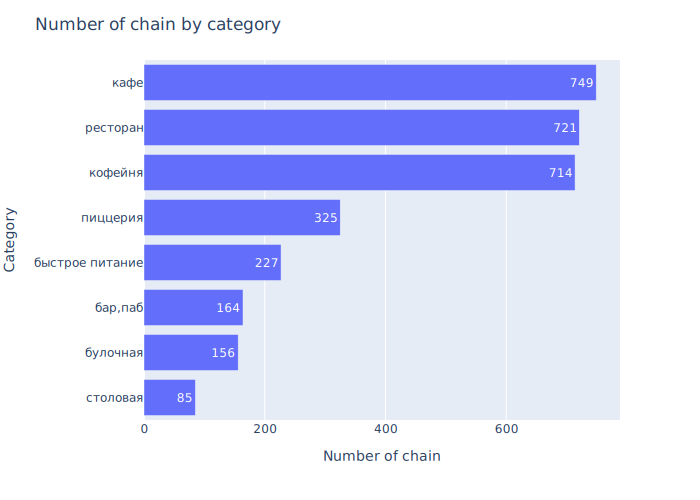

In [82]:

fig = px.bar(category_chain_.sort_values(by='chain_count', ascending=True), 
             x='chain_count', 
             y='category', 
             text='chain_count'                      
            )

fig.update_layout(title='Number of chain by category',
                   xaxis_title='Number of chain',
                   yaxis_title='Category')
fig.show() 


<AxesSubplot:xlabel='category'>

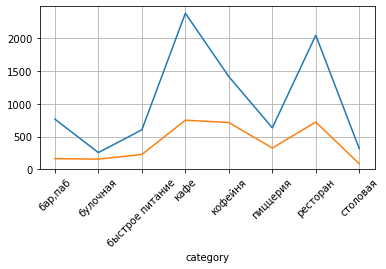

In [83]:
data.groupby(['category'])['name'].count().plot(grid=True,figsize=(6,3),rot=45,ylim=0)
data_chain.groupby(['category'])['name'].count().plot(grid=True,figsize=(6,3),rot=45,ylim=0)

In [84]:
total_chain=data_chain['chain'].count()
total_count=data['name'].count()
category_chain = pd.DataFrame()
category_chain['category_count']=data.groupby(['category'])['name'].count()
category_chain['category_chain_count']=data_chain.groupby('category')['name'].count()
category_chain['category_ratio']=round(category_chain['category_chain_count']/category_chain['category_count']*100,2)
category_chain['chain_ratio']=round(category_chain['category_chain_count']/total_chain*100,2)
category_chain['total_chain_ratio']=round(category_chain['category_chain_count']/total_count*100,2)
category_chain.reset_index().sort_values('chain_ratio', ascending = False)  

,category,category_count,category_chain_count,category_ratio,chain_ratio,total_chain_ratio
3,кафе,2378,749,31.50,23.85,8.91
6,ресторан,2043,721,35.29,22.95,8.58
4,кофейня,1413,714,50.53,22.73,8.49
5,пиццерия,633,325,51.34,10.35,3.87
2,быстрое питание,603,227,37.65,7.23,2.70
0,"бар,паб",765,164,21.44,5.22,1.95
1,булочная,256,156,60.94,4.97,1.86
7,столовая,315,85,26.98,2.71,1.01


Категории заведений общественного питания, которые чаще всего являются сетевыми - кафе (749 сетевых кафе, что составляет 23.85% от общего числа сетевых заведений 3141, 31.5% от общего числа заведений категории кафе 2378 и 8.91% от общего числа заведений всех категорий 8406), рестораны (721 сетевых ресторанов или 22.95% от общего числа сетевых заведений, 35.29% от числа ресторанов, 8.58% от заведений всех категорий),  кофейни (714 сетевых кофеен или 22.73% от сетевых заведений, 50.53% от числа всех кофеен, 8.49% от числа всех заведений.

Реже всего сетевыми заведениями являются столовые. Только 85 столовых являются сетевыми, что составляет 2.71% от числа сетевых заведений, 26.98% от числа столовых и 1.01% от всех заведений.

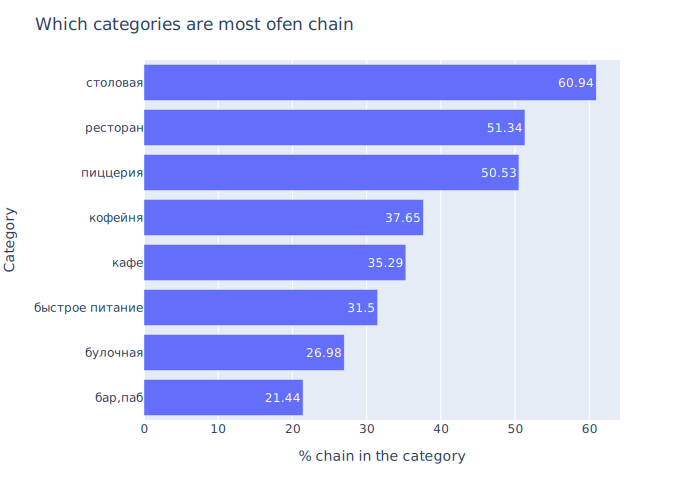

In [85]:
fig = px.bar(category_chain.sort_values(by='category_ratio', ascending=True), 
             x='category_ratio', 
             y=category_chain.index, 
             text='category_ratio'                      
            )

fig.update_layout(title='Which categories are most ofen chain',
                   xaxis_title='% chain in the category',
                   yaxis_title='Category')
fig.show() 

Сетевыми от общего числа заведений своей категории столовые составляют 60.94%, рестораны- 51.34%, пиццерии -50.53%, кофейни - 37.65%, кафе -35.29%, заведения быстрого питания -31.5%, булочные - 26.98% и бар,пабы -21.44%.

<a id='top_chain'>
3.5 Исследование наиболее популярных сетей Москвы
</a>

Сгруппируем сети по названиям. Выведем ТОП-15 самых многочисленных сетей.

In [86]:
data_chain.groupby('name')['name'].count().sort_values(ascending=False).head(15)

name
Шоколадница                            120
Домино'с Пицца                          76
Додо Пицца                              74
Яндекс Лавка                            72
One Price Coffee                        71
Cofix                                   65
Prime                                   50
Хинкальная                              44
КОФЕПОРТ                                42
Кулинарная лавка братьев Караваевых     39
Теремок                                 38
Чайхана                                 37
CofeFest                                32
Буханка                                 32
Му-Му                                   27
Name: name, dtype: int64

В ТОП-15 самых многочисленных сетей по числу заведений вошли следующие сети: Шоколадница-120 заведений, Домино'с Пицца-76, Додо Пицца -74, Яндекс Лавка -72, One Price Coffee - 71, Cofix- 65, Prime - 50, Хинкальная-44, КОФЕПОРТ-42, Кулинарная лавка братьев Караваевых-39, Теремок-38, Чайхана-37, CofeFest -32, Буханка - 32, Му-Му -27. Это в большинстве своем известные сети, имеющие заведения не только в Москве, но и во многих регионах России.

Рассмотрим ТОП-15 сетей по категориям.

In [87]:
chain_top=(data_chain.groupby('name',as_index=False).agg(count_object=('category','count'))\
            .sort_values(by='count_object',ascending=False))[:15]

In [88]:
top_chain=chain_top['name'].unique()

In [89]:
chain_top_=data_chain.query('name in @top_chain')

In [90]:
chain_top1=chain_top_.groupby('category',as_index=False).agg(count_object=('category','count'))\
.sort_values(by='count_object',ascending=False)
chain_top1

,category,count_object
4,кофейня,336
6,ресторан,189
5,пиццерия,151
3,кафе,100
1,булочная,25
2,быстрое питание,12
0,"бар,паб",4
7,столовая,2


In [91]:
len(chain_top_)

819

Всего в выявленныx ТОП-15 сетей входит 819 заведений. Наибольшее количество заведений относится к категории кофеен - 336 или 41% от числа заведений ТОП-15 сетей. Наименьшее количество - к категории столовая - 2 заведения или 0.2%

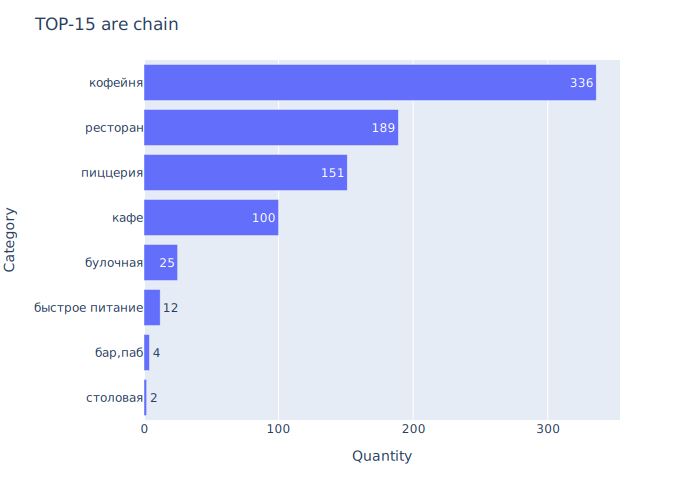

In [92]:

fig = px.bar(chain_top1.sort_values(by='count_object', ascending=True), 
             x='count_object', 
             y='category', 
             text='count_object'                      
            )

fig.update_layout(title='TOP-15 are chain',
                   xaxis_title='Quantity',
                   yaxis_title='Category')
fig.show() 

In [93]:
chain_top_.describe()

,lat,lng,rating,middle_avg_bill,middle_coffee_cup,chain,seats
count,819.000000,819.000000,819.000000,253.000000,138.000000,819.0,529.000000
mean,55.748544,37.604691,4.142125,471.557312,170.615942,1.0,109.720227
std,0.073715,0.101683,0.338045,246.131550,148.934822,0.0,125.680003
min,55.581429,37.379940,1.700000,150.000000,60.000000,1.0,0.000000
25%,55.695580,37.527310,4.100000,344.000000,82.500000,1.0,40.000000
50%,55.754718,37.601577,4.200000,415.000000,97.500000,1.0,75.000000
75%,55.795929,37.662596,4.300000,500.000000,256.000000,1.0,143.000000
max,55.910447,37.863639,4.900000,2250.000000,1568.000000,1.0,1288.000000


Для ТОП-15 сетей характерны следующие медианные и средние значения: количество посадочных мест -75-медианное, 110 - среднее, рейтинг - 4.2 и 4.1, число с оценкой среднего чека - 415.0 и 471.56, число с оценкой одной чашки капучино -97.50 и 170.62 соответственно. Прослеживается доступность среднего чека и достаточно большое количество посадочных мест, но предполагаю, что основные площади без банкетных залов.

In [94]:
count_object=chain_top_.groupby(['name','category','rating']).agg({'name': 'count', 'seats': 'median'})\
.sort_values(by='seats',ascending=False)
count_object.head()

name  seats
name       category        rating             
Додо Пицца пиццерия        4.7        1  428.0
Му-Му      быстрое питание 4.2        2  300.0
           пиццерия        4.3        1  300.0
Чайхана    ресторан        4.3        2  258.5
Додо Пицца пиццерия        3.7        1  250.0

По количеству посадочных мест ТОП-15 сетей наибольшее количество у сети Му-Му. В данную сеть входят 1 пиццерия с количеством посадочных мест -300, 2 заведения быстрого питания с 300 посадочными местами, 1 бар,паб - 195, 12 кафе  - по 150, 8 ресторанов по 135, 2 кофейни по 120 и 1 столовая с 60 посадочными местами. 

Text(0.5, 1.0, 'Распределение ТОП-15 сетевых заведений по количеству объектов и посадочных мест')

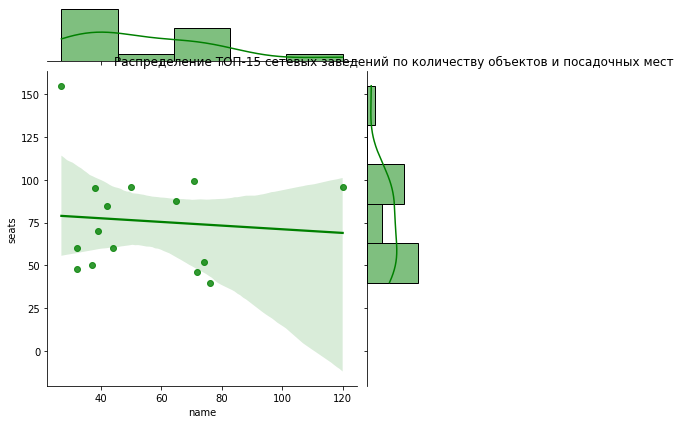

In [95]:
count_object=chain_top_.groupby('name').agg({'name': 'count', 'seats': 'median'})
sns.jointplot(x='name', y='seats', data=count_object, kind='reg', color='green',height=6)
plt.title('Распределение ТОП-15 сетевых заведений по количеству объектов и посадочных мест')

Рассмотрим распределение ТОП-15 сетей по административным округам.

In [96]:
district_totals=chain_top_.groupby(['district','category']).size().sort_values(ascending=False)

In [97]:
district_totals

district                                 category       
Центральный административный округ       кофейня            94
                                         ресторан           60
                                         кафе               47
Западный административный округ          кофейня            41
Северный административный округ          кофейня            40
Северо-Восточный административный округ  кофейня            37
Южный административный округ             кофейня            34
Восточный административный округ         кофейня            30
Южный административный округ             ресторан           28
Юго-Западный административный округ      кофейня            25
Южный административный округ             пиццерия           23
Восточный административный округ         пиццерия           20
Северный административный округ          пиццерия           20
Северо-Западный административный округ   кофейня            20
Западный административный округ          ресторан           1

Большинство сетей из ТОП-15 приходится на Центральный административный округ: 94 кофейни,60 ресторанов и 47 кафе, в то же время, только 1 столовая, 1 булочная, 1 паб,бар, 2 заведения быстрого питания, 9 пиццерий.

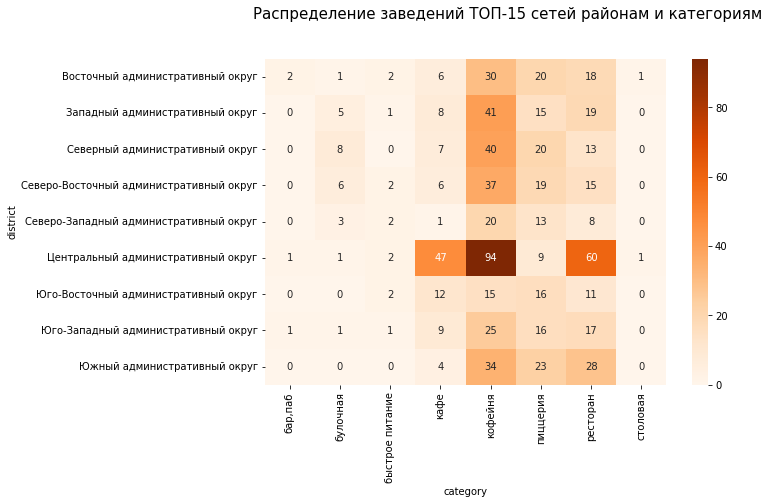

In [98]:
fig, ax = plt.subplots(figsize=(9, 6))
chain_top1 = chain_top_.pivot_table(index='district',columns='category',values='name',
                                        aggfunc='count', fill_value=0)
sns.heatmap(chain_top1, annot=True, cmap='Oranges', ax=ax)
fig.suptitle('Распределение заведений ТОП-15 сетей районам и категориям', y=1,fontsize=15)

plt.show()

Рассмотрим соотношение всех сетевых заведений Москвы по административным округам и категориям заведений.

In [99]:
pt=data_chain.pivot_table(index=['district','category'],values='name',aggfunc='count')
pt.columns=['count']
pt.head(10)

count
district                         category              
Восточный административный округ бар,паб             10
                                 булочная             9
                                 быстрое питание     28
                                 кафе                64
                                 кофейня             51
                                 пиццерия            38
                                 ресторан            62
                                 столовая            10
Западный административный округ  бар,паб              8
                                 булочная            25

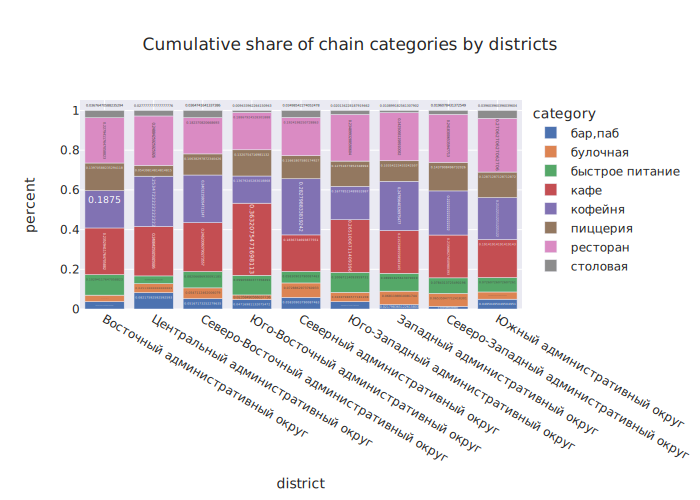

In [100]:
pt=pt.reset_index()
pt['percent']=''
pt.iloc[0:8,3]=pt.iloc[0:8,2]/sum(pt.iloc[0:8,2])
pt.iloc[8:16,3]=pt.iloc[8:16,2]/sum(pt.iloc[8:16,2])
pt.iloc[16:24,3]=pt.iloc[16:24,2]/sum(pt.iloc[16:24,2])
pt.iloc[24:32,3]=pt.iloc[24:32,2]/sum(pt.iloc[24:32,2])
pt.iloc[32:40,3]=pt.iloc[32:40,2]/sum(pt.iloc[32:40,2])
pt.iloc[40:48,3]=pt.iloc[40:48,2]/sum(pt.iloc[40:48,2])
pt.iloc[48:56,3]=pt.iloc[48:56,2]/sum(pt.iloc[48:56,2])
pt.iloc[56:64,3]=pt.iloc[56:64,2]/sum(pt.iloc[56:64,2])
pt.iloc[64:,3]=pt.iloc[64:,2]/sum(pt.iloc[64:,2])
pt=pt.sort_values('category')

fig=px.bar(pt,
          x='district',
          y='percent',
          title='Cumulative share of chain categories by districts',
          color='category',
          template='seaborn',
          text='percent')
fig.update_layout(coloraxis_showscale=False)
fig.show()

Наибольшее количество сетевых заведений - кафе, рестораны и кафетерии во всех административных округах. Столовые, паб,бар, булочные -этих категорий наименьшее количество по всем округам.

<a id='district'>
3.6 Анализ заведений по административным районам Москвы
</a>

Сгруппируем заведения по административным районам Москвы.

In [101]:
data.groupby(['district'])['name'].count()

district
Восточный административный округ            798
Западный административный округ             851
Северный административный округ             900
Северо-Восточный административный округ     891
Северо-Западный административный округ      409
Центральный административный округ         2242
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Южный административный округ                892
Name: name, dtype: int64

In [102]:
district_ = pd.DataFrame()
district_['district_count']=data.groupby('district')['name'].count()
district_['district_total_perc']=district_['district_count']/8406
district_.sort_values('district_total_perc', ascending = False)  

,district_count,district_total_perc
district,,
Центральный административный округ,2242,0.266714
Северный административный округ,900,0.107066
Южный административный округ,892,0.106115
Северо-Восточный административный округ,891,0.105996
Западный административный округ,851,0.101237
Восточный административный округ,798,0.094932
Юго-Восточный административный округ,714,0.084939
Юго-Западный административный округ,709,0.084345
Северо-Западный административный округ,409,0.048656


По административным районам Москвы заведения общественного питания распределяются следующим образом: наибольшее количество заведений расположено в Центральном административном округе - 2242 или 26,67% от числа всех заведений, в Северном административном округе - 900 или 9.7%, в Южном административном округе -892 или 10.61%, в Северо-Восточном - 891 или 10.6%, в Западном -851 -10.12%, в Восточном -798 - 9.49%, в Юго-Восточном -714 - 8.49%, в Юго-Западном - 709 - 8.43% и наименьшее количество заведений - в Северо-Западном - 409 - 4.86%.

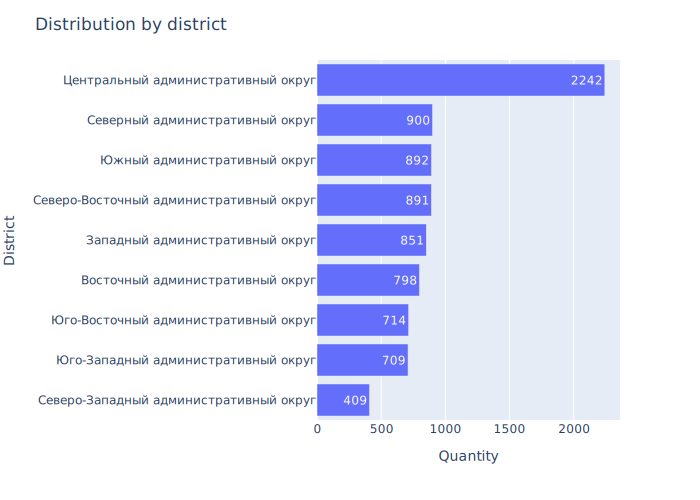

In [103]:
district1=data.groupby('district')['name'].agg(['count']).reset_index()
district1.columns=['district','count']
district1.sort_values(by='count', ascending=False)

fig = px.bar(district1.sort_values(by='count', ascending=True), 
             x='count', 
             y='district', 
             text='count'                      
            )

fig.update_layout(title='Distribution by district',
                   xaxis_title='Quantity',
                   yaxis_title='District')
fig.show() 

In [104]:
dc=data.groupby(['district','category']).size().sort_values(ascending=False)
dc.head(10)

district                                 category
Центральный административный округ       ресторан    670
                                         кафе        464
                                         кофейня     428
                                         бар,паб     364
Юго-Восточный административный округ     кафе        282
Восточный административный округ         кафе        272
Северо-Восточный административный округ  кафе        269
Южный административный округ             кафе        264
Западный административный округ          кафе        239
Юго-Западный административный округ      кафе        238
dtype: int64

Наибольшее количество заведений общественного питания в Москве по административным округам по категориям распределяется следующим образом: Центальный административный округ - рестораны -670 заведений, кафе - 464, кофейни -428, паб,бар - 364; Юго_Восточный - кафе -282, Восточный - кафе -272, Северо_Восточный - кафе -269, Южный - кафе -264, Западный - кафе - 239, Юго-Западный - кафе -238.
Наиболее многочисленными являются заведения категории кафе.

In [105]:
dc=data.groupby(['district','category']).size().sort_values()
dc.head(10)

district                                category
Северо-Западный административный округ  булочная    12
Юго-Восточный административный округ    булочная    13
Юго-Западный административный округ     столовая    17
Северо-Западный административный округ  столовая    18
                                        бар,паб     23
Западный административный округ         столовая    24
Восточный административный округ        булочная    25
Южный административный округ            булочная    25
Юго-Восточный административный округ    столовая    25
Юго-Западный административный округ     булочная    27
dtype: int64

Наименьшее количество заведений по административным округам по категориям распределяются: Северо-Западный административный округ - булочная -12, Юго-Восточный - булочная -13, столовая - 25, Юго-Западный - столовая -17, булочная - 27, Северо-Западный - столовая -18, паб,бар - 23, Западный - столовая -24, Восточный - булочная -25, Южный - булочная -25.
Самыми самочисленными являются заведения категории булочная и столовая.

In [106]:
pt_total=data.pivot_table(index=['district','category'],values='name',aggfunc='count')
pt_total.columns=['count']
pt_total.head(10)

count
district                         category              
Восточный административный округ бар,паб             53
                                 булочная            25
                                 быстрое питание     71
                                 кафе               272
                                 кофейня            105
                                 пиццерия            72
                                 ресторан           160
                                 столовая            40
Западный административный округ  бар,паб             50
                                 булочная            37

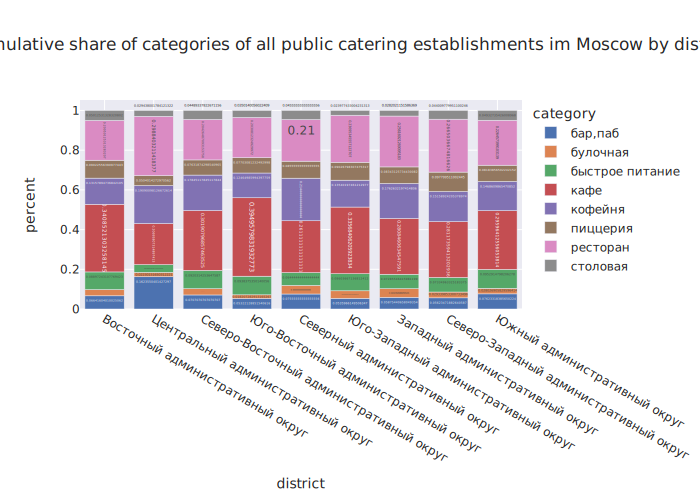

In [107]:
pt_total=pt_total.reset_index()
pt_total['percent']=''
pt_total.iloc[0:8,3]=pt_total.iloc[0:8,2]/sum(pt_total.iloc[0:8,2])
pt_total.iloc[8:16,3]=pt_total.iloc[8:16,2]/sum(pt_total.iloc[8:16,2])
pt_total.iloc[16:24,3]=pt_total.iloc[16:24,2]/sum(pt_total.iloc[16:24,2])
pt_total.iloc[24:32,3]=pt_total.iloc[24:32,2]/sum(pt_total.iloc[24:32,2])
pt_total.iloc[32:40,3]=pt_total.iloc[32:40,2]/sum(pt_total.iloc[32:40,2])
pt_total.iloc[40:48,3]=pt_total.iloc[40:48,2]/sum(pt_total.iloc[40:48,2])
pt_total.iloc[48:56,3]=pt_total.iloc[48:56,2]/sum(pt_total.iloc[48:56,2])
pt_total.iloc[56:64,3]=pt_total.iloc[56:64,2]/sum(pt_total.iloc[56:64,2])
pt_total.iloc[64:,3]=pt_total.iloc[64:,2]/sum(pt_total.iloc[64:,2])

pt_total=pt_total.sort_values('category')

fig=px.bar(pt_total,
          x='district',
          y='percent',
          title='Cumulative share of categories of all public catering establishments im Moscow by district',
          color='category',
          template='seaborn',
          text='percent')
fig.update_layout(coloraxis_showscale=False)
fig.show()

В Восточном административном округе наибольшее количество заведений относится к категории кафе, что составляет 34.1% от числа заведений в округе, наименьшее - к категории булочная - 3.1%, в Центральном - рестораны -29.9%, булочные 2.2%, в Северо-Восточном - кафе - 30.2%, булочные -3.1%, в Юго-Восточном - кафе - 39.5%, булочные - 1.8%, в Северном - кафе -26.1%, булочные - 4.3%, в Юго-Западном - кафе - 33.6%, столовые - 2.4%, в Западном - кафе - 28.1%, столовые - 2.8%, в Северо-Западном - кафе - 28.1%, булочные - 2.9%, в Южном - кафе -29.5%, булочные - 2.8% соответственно.

<a id='rating'>
3.7 Распределение средних рейтингов по категориям заведений
</a>

Сгруппируем рейтинги по категориям заведений.

In [108]:
data.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

category
бар,паб            4.387712
пиццерия           4.301264
ресторан           4.290357
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123886
быстрое питание    4.050249
Name: rating, dtype: float64

Средние рейтинги незначительно отличаются в зависимости от категории заведения. Самый высокий средний рейтинг у категории бар,паб - 4.38, самый низкий - у категории быстрое питание -4.05.

Посмотрим на графике зависимость рейтинга от категории заведения по средним и медианным значениям.

In [109]:
rating=data.groupby('category')['rating'].agg(['count','mean','median']).reset_index()
rating.columns=['category','count','rating_mean','rating_median']
rating.sort_values(by='rating_median', ascending=False)

,category,count,rating_mean,rating_median
0,"бар,паб",765,4.387712,4.4
1,булочная,256,4.268359,4.3
4,кофейня,1413,4.277282,4.3
5,пиццерия,633,4.301264,4.3
6,ресторан,2043,4.290357,4.3
7,столовая,315,4.211429,4.3
2,быстрое питание,603,4.050249,4.2
3,кафе,2378,4.123886,4.2


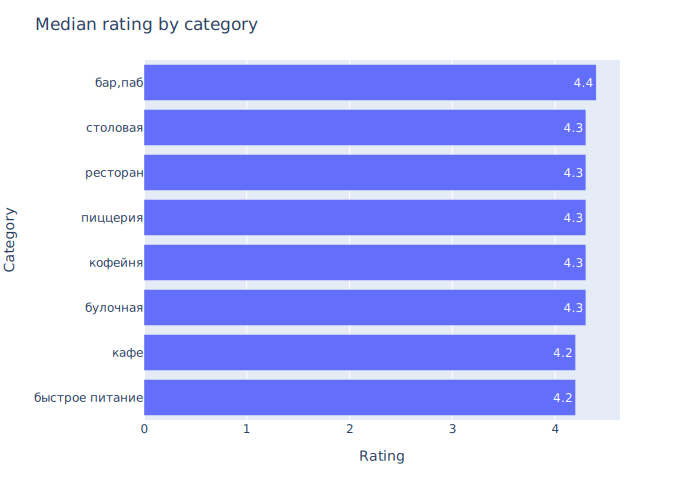

In [110]:
fig = px.bar(rating.sort_values(by='rating_median', ascending=True), 
             x='rating_median', 
             y='category', 
             text='rating_median',
            )

fig.update_layout(title='Median rating by category',
                   xaxis_title='Rating',
                   yaxis_title='Category')
fig.show() 

Средние и медианные значения отличаются незначительно и не показывают большой зависимости от категории заведения. 

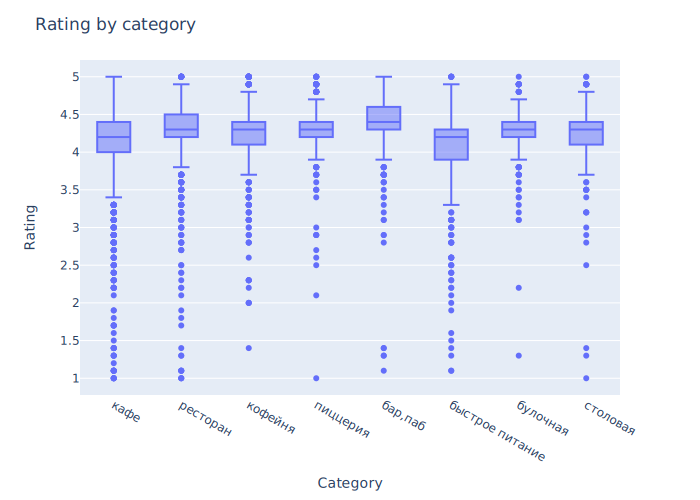

In [111]:
fig = px.box(data, 
             x='category', 
             y='rating', 
            )

fig.update_layout(title='Rating by category',
                   xaxis_title='Category',
                   yaxis_title='Rating')
fig.show()

Выведем описание данных по столбцу.

In [112]:
data['rating'].describe()

count    8406.000000
mean        4.229895
std         0.470348
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

В данных присутствуют выбивающиеся значения, где рейтинг равен 1. Выведем срез этих данных.

In [113]:
data[(data.rating==1)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
1125,На мангале,кафе,"Москва, проспект Мира, 119, стр. 503",Северо-Восточный административный округ,"ежедневно, 10:00–21:00",55.830405,37.617687,1.0,высокие,Средний счёт:4000–5000 ₽,4500.0,NaN,0,NaN,False,проспект Мира
4222,Сетунь,ресторан,"Москва, 1-й Сетуньский проезд, 10с1",Западный административный округ,"ежедневно, 11:00–23:00",55.733738,37.536305,1.0,NaN,NaN,NaN,NaN,0,NaN,False,1-й Сетуньский проезд
5613,Тесто и сыр,пиццерия,"Москва, Рязанский проспект, 2к2",Юго-Восточный административный округ,"ежедневно, 10:00–22:00",55.729974,37.732291,1.0,NaN,NaN,NaN,NaN,0,NaN,False,Рязанский проспект
5740,Улей,столовая,"Москва, Западный административный округ, район...",Западный административный округ,пн-пт 10:00–18:00,55.706255,37.521231,1.0,NaN,NaN,NaN,NaN,0,NaN,False,Западный административный округ
5780,Стар,кафе,"Москва, Веерная улица, 24Г",Западный административный округ,"пн,вт,ср,чт,вс 11:00–22:00",55.708703,37.484800,1.0,NaN,NaN,NaN,NaN,0,NaN,False,Веерная улица
5808,Полянка,кафе,"Москва, улица Удальцова, 75А",Западный административный округ,nan,55.678064,37.496099,1.0,NaN,NaN,NaN,NaN,1,40.0,False,улица Удальцова
5833,Добро пожаловать,ресторан,"Москва, Рябиновая улица, 47, стр. 1",Западный административный округ,пн-пт 08:00–16:30,55.695988,37.424938,1.0,NaN,NaN,NaN,NaN,0,80.0,False,Рябиновая улица
6167,Универ,кафе,"Москва, Западный административный округ, район...",Западный административный округ,пн-пт 09:00–20:00; сб 09:00–18:00,55.697720,37.538234,1.0,NaN,NaN,NaN,NaN,0,NaN,False,Западный административный округ
6757,Омореморе,ресторан,"Москва, Ленинский проспект, 108, стр. 1",Западный административный округ,"ежедневно, 09:00–23:00",55.669702,37.512464,1.0,NaN,NaN,NaN,NaN,1,290.0,False,Ленинский проспект
7629,Pho Street,кафе,"Москва, Новоясеневский проспект, 11",Юго-Западный административный округ,"ежедневно, 10:00–22:00",55.606584,37.536446,1.0,NaN,NaN,NaN,NaN,1,70.0,False,Новоясеневский проспект


По выведенным данным не прослеживается закономерность зависимости рейтинга от категории заведения.

In [114]:
data.groupby('category').agg({'rating': ['count','mean','median']})
data.pivot_table(columns='category',values='rating',aggfunc=('count','mean','median'))

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
count,765.000000,256.000000,603.000000,2378.000000,1413.000000,633.000000,2043.000000,315.000000
mean,4.387712,4.268359,4.050249,4.123886,4.277282,4.301264,4.290357,4.211429
median,4.400000,4.300000,4.200000,4.200000,4.300000,4.300000,4.300000,4.300000


<a id='rating_Choropleth'>
3.8 Фоновая картограмма со средним рейтингом заведений районов Москвы
</a>

Импортируем карту и хороплет.

In [115]:
#from folium import Map,Choropleth

Загружаем JSON-файл с границами округов Москвы.

In [116]:
state_geo='/datasets/admin_level_geomap.geojson'

Выводим уникальные значения округов.

In [117]:
data['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Группируем округа по медианному рейтингу.

In [118]:
rating_data = data.groupby('district', as_index=False)['rating'].agg('median')
rating_data

,district,rating
0,Восточный административный округ,4.3
1,Западный административный округ,4.3
2,Северный административный округ,4.3
3,Северо-Восточный административный округ,4.2
4,Северо-Западный административный округ,4.3
5,Центральный административный округ,4.4
6,Юго-Восточный административный округ,4.2
7,Юго-Западный административный округ,4.3
8,Южный административный округ,4.3


Читаем файл и сохраняем в переменной.

In [119]:
#with open('/datasets/admin_level_geomap.geojson', 'r') as f:
    #geo_json = json.load(f)

Сохраняем широту и долготу центра Москвы.

In [120]:
moscow_lat, moscow_lng = 55.751244, 37.618423

Создаем карту Москвы.

In [121]:
#m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

Создаем хороплет с помощью конструктора Choropleth, добавляем его на карту и выводим карту.

In [122]:
#Choropleth(
    #geo_data=state_geo,
    #data=rating_data,
    #columns=['district', 'rating'],
    #key_on='feature.name',
    #fill_color='YlGn',
    #fill_opacity=0.8,
    #legend_name='Медианный рейтинг заведений по районам',
#).add_to(m)
#m

<a id='claster'>
3.9 Отображение всех заведений на карте с помощью кластеров
</a>

Импортируем карту, маркер и кластер. Создаём пустой кластер, добавляем его на карту. Пишем функцию, которая принимает строку датафрейма,создаёт маркер в текущей точке и добавляет его в кластер marker_cluster.

Применяем функцию create_clusters() к каждой строке датафрейма и выводим карту.

In [123]:

#from folium import Map, Marker

#from folium.plugins import MarkerCluster


#moscow_lat, moscow_lng = 55.751244, 37.618423


#m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

#marker_cluster = MarkerCluster().add_to(m)

#def create_clusters(row):
    #Marker(
        #[row['lat'], row['lng']],
        #popup=f"{row['name']} {row['rating']}",
    #).add_to(marker_cluster)


#data.apply(create_clusters, axis=1)


#m

<a id='top_street'>
3.10 Анализ топ-15 улиц по количеству заведений
</a>

Выводим уникальные значения столбца с названиями улиц.

In [124]:
data['street'].unique()

array([' улица Дыбенко', ' Клязьминская улица',
       ' улица Маршала Федоренко', ..., ' улица Хлобыстова',
       ' Новороссийская улица', ' Чонгарский бульвар'], dtype=object)

Группируем данные по количеству заведений, расположенных на каждой улице. Выведем первые 15 значений.

In [125]:
data.groupby('street')['name'].count().sort_values(ascending=False).head(15)

street
 проспект Мира             184
 Профсоюзная улица         122
 проспект Вернадского      108
 Ленинский проспект        107
 Ленинградский проспект     95
 Дмитровское шоссе          88
 Каширское шоссе            77
 Варшавское шоссе           76
 Ленинградское шоссе        70
 МКАД                       65
 Люблинская улица           60
 улица Вавилова             55
 Кутузовский проспект       54
 улица Миклухо-Маклая       49
 Пятницкая улица            48
Name: name, dtype: int64

Наибольшее количество заведений находится на проспекте Мира - 184, Профсоюзной улице - 122,  проспекте Вернадского -108, Ленинской проспекте -107, Ленинградском проспекте -95, Дмитровском шоссе - 88, Каширском шоссе - 77, Варшавском шоссе - 76, Ленинградском шоссе -70, МКАД -65, Люблинской улице -60, улице Вавилова -55, Кутузовском проспекте - 54, улице Миклухо-Маклая - 49, Пятницкой улице -48.

In [126]:
data.groupby('street',as_index=False).agg(count_object=('name','count')).sort_values(by='count_object',ascending=False)

,street,count_object
1090,проспект Мира,184
773,Профсоюзная улица,122
1087,проспект Вернадского,108
525,Ленинский проспект,107
523,Ленинградский проспект,95
...,...,...
709,Павелецкая набережная,1
712,Панкратьевский переулок,1
716,Парусный проезд,1
717,Певческий переулок,1


In [127]:
street_top=(data.groupby('street',as_index=False).agg(count_object=('name','count'))\
            .sort_values(by='count_object',ascending=False))[:15]

In [128]:
top_streets=street_top['street'].unique()

In [129]:
street_top_=data.query('street in @top_streets')

Сгруппируем по категориям те заведений, которые расположены на ТОП-15 улицах с наибольшим количеством заведений.

In [130]:
street_top_.groupby('category',as_index=False).agg(count_object=('category','count'))\
.sort_values(by='count_object',ascending=False)

,category,count_object
3,кафе,353
6,ресторан,327
4,кофейня,220
2,быстрое питание,117
0,"бар,паб",91
5,пиццерия,84
7,столовая,40
1,булочная,26


In [131]:
len(street_top_)

1258

На ТОП-15 улицах расположено 1258 заведений общественного питания: 353 кафе, 327 ресторана, 220 кофеен, 117 заведений быстрого питания, 91 бар,паба, 84 пиццерии, 40 столовых и 26 булочных.

In [132]:
street_top1=street_top_.groupby('street')['name'].agg(['count']).reset_index()
street_top1.columns=['street','count']
street_top1.sort_values(by='count', ascending=False)

,street,count
12,проспект Мира,184
9,Профсоюзная улица,122
11,проспект Вернадского,108
6,Ленинский проспект,107
4,Ленинградский проспект,95
1,Дмитровское шоссе,88
2,Каширское шоссе,77
0,Варшавское шоссе,76
5,Ленинградское шоссе,70
8,МКАД,65


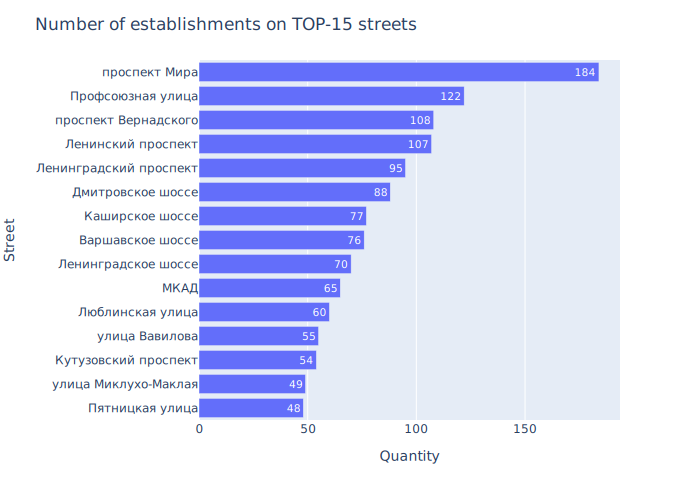

In [133]:
fig = px.bar(street_top1.sort_values(by='count', ascending=True), 
             x='count', 
             y='street', 
             text='count'                      
            )

fig.update_layout(title='Number of establishments on TOP-15 streets',
                   xaxis_title='Quantity',
                   yaxis_title='Street')
fig.show() 

In [134]:
str_total=street_top_.pivot_table(index=['street','category'],values='name',aggfunc='count')
str_total.columns=['count']
str_total.head()

count
street            category              
 Варшавское шоссе бар,паб              6
                  быстрое питание      7
                  кафе                18
                  кофейня             14
                  пиццерия             4

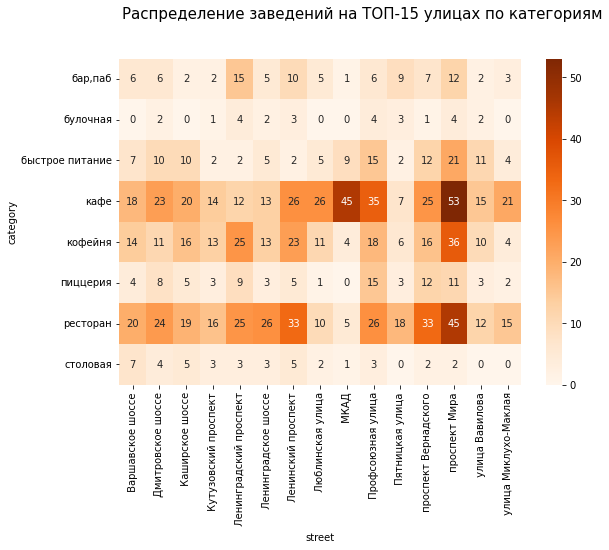

In [135]:
fig, ax = plt.subplots(figsize=(9, 6))
str_total = street_top_.pivot_table(index='category',columns='street',values='name',
                                        aggfunc='count', fill_value=0)
sns.heatmap(str_total, annot=True, cmap='Oranges', ax=ax)
fig.suptitle('Распределение заведений на ТОП-15 улицах по категориям', y=1,fontsize=15)
plt.show()

Тенденция при рассмотрении расположения заведений на ТОП-15 улицах сохраняется такое же, как и по администратичным округам. Наибольшее количество заведений относится к категориям кафе, ресторан и кофейня. Наименьшее - к категории булочная и столовая.

<a id='one_object'>
3.11 Рассмотрим улицы, на которых находится только один объект общепита
</a>

Сгруппируем и выведем улицы, на которых находится только один объект общепита, посчитаем их количество.

In [136]:
len(data.groupby('street',as_index=False).agg(count_object=('name','count')).sort_values(by='count_object',\
                                                                                     ascending=False).query('count_object==1'))

458

In [137]:
data.groupby('street',as_index=False).agg(count_object=('name','count')).sort_values(by='count_object',\
                                                                                     ascending=False).query('count_object==1')

,street,count_object
1421,улица Фотиевой,1
1418,улица Фадеева,1
1233,улица Кирпичные Выемки,1
1092,сад Эрмитаж,1
1220,улица Ивана Франко,1
...,...,...
709,Павелецкая набережная,1
712,Панкратьевский переулок,1
716,Парусный проезд,1
717,Певческий переулок,1


In [138]:
one_street=(data.groupby('street',as_index=False).agg(count_object=('name','count'))\
            .sort_values(by='count_object',ascending=False)).query('count_object==1')

In [139]:
one_street_list=one_street['street'].unique()

In [140]:
one_street_=data.query('street in @one_street_list')

Посмотрим районы, на которых находятся эти улицы.

In [141]:
one_str=one_street_.groupby(['district'],as_index=False).agg(count_object=('name','count'))\
.sort_values(by='count_object',ascending=False)
one_str.columns=['district','count_object']
one_str.head(10)

,district,count_object
5,Центральный административный округ,145
3,Северо-Восточный административный округ,55
0,Восточный административный округ,52
2,Северный административный округ,52
8,Южный административный округ,43
6,Юго-Восточный административный округ,39
1,Западный административный округ,35
4,Северо-Западный административный округ,19
7,Юго-Западный административный округ,18


Улицы, на которых находится только одно заведение общественного питания, делятся по округам следующим образом: в Центральном административной округе находится 145 улиц, в Северо_Восточном - 55, Восточном -52, Северном -52, Южном -43, Юго-Восточном -39, Западном -35, Северо-Западном -19, Юго-Западном -18.

Большинство улиц с одним заведением находятся в Центральном административном округе -145 из 458 (31.66%). Возможно, это всязано с тем, что в центре много маленьких тихих улиц и переулков, где нет большого траффика машин и пешеходов, как на более крупных улицах.

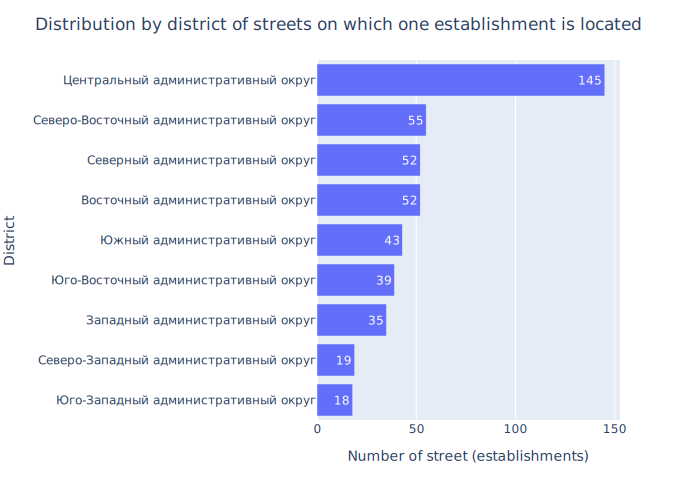

In [142]:
fig = px.bar(one_str.sort_values(by='count_object', ascending=True), 
             x='count_object', 
             y='district', 
             text='count_object'                      
            )

fig.update_layout(title='Distribution by district of streets on which one establishment is located',
                   xaxis_title='Number of street (establishments)',
                   yaxis_title='District')
fig.show() 

<a id='avg_bill'>
3.12 Анализ средних чеков заведений
</a>

Выводим описание значений столбца middle_avg_bill -число с оценкой среднего чека.

In [143]:
data['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Минимальное значение -0, максимальное -35000.

Посмотрим срезы по заведениям со средним чеком <= 100 рублей и со средним чеком >=10000.

In [144]:
data[(data.middle_avg_bill<=100)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
717,Бобс кофе,быстрое питание,"Москва, Сигнальный проезд, 6А",Северо-Восточный административный округ,"ежедневно, 07:00–23:00",55.848618,37.590500,4.3,низкие,Средний счёт:60–140 ₽,100.0,NaN,0,10.0,False,Сигнальный проезд
1951,Пончики! Выпекаем на месте,кофейня,"Москва, улица Яблочкова, 19Г",Северо-Восточный административный округ,"ежедневно, 08:00–22:00",55.819120,37.578073,4.6,NaN,Средний счёт:от 50 ₽,50.0,NaN,1,250.0,False,улица Яблочкова
2316,Монастырская чайная,кафе,"Москва, 2-й Красносельский переулок, 5с3",Центральный административный округ,"ежедневно, 09:00–21:00",55.783773,37.666269,4.1,NaN,Средний счёт:35–100 ₽,67.0,NaN,0,NaN,False,2-й Красносельский переулок
3688,Кофемания,кофейня,"Москва, улица Новый Арбат, 19",Центральный административный округ,"ежедневно, круглосуточно",55.752136,37.587784,4.5,высокие,Средний счёт:от 0 ₽,0.0,NaN,1,200.0,True,улица Новый Арбат
5420,Пончики! Выпекаем на месте,булочная,"Москва, Новокосинская улица, 35",Восточный административный округ,"ежедневно, 08:00–22:00",55.743570,37.866127,4.3,NaN,Средний счёт:от 50 ₽,50.0,NaN,1,4.0,False,Новокосинская улица
6261,Мое кафе,кафе,"Москва, Черёмушкинский проезд, 5",Юго-Западный административный округ,"пн-пт 08:00–20:00; сб,вс 09:00–19:00",55.691899,37.572497,3.7,низкие,Средний счёт:от 100 ₽,100.0,NaN,1,NaN,False,Черёмушкинский проезд
6428,Бургер Mix,быстрое питание,"Москва, улица Гурьянова, 2А",Юго-Восточный административный округ,"ежедневно, 10:00–21:00",55.693587,37.722745,4.1,низкие,Средний счёт:90 ₽,90.0,NaN,0,40.0,False,улица Гурьянова
6543,Пончики! Выпекаем на месте,кофейня,"Москва, проспект Вернадского, 109",Западный административный округ,пн-сб 08:00–22:00; вс 09:00–22:00,55.662333,37.483580,4.7,NaN,Средний счёт:от 50 ₽,50.0,NaN,1,5.0,False,проспект Вернадского
6730,French Bakery,кафе,"Москва, улица Миклухо-Маклая, 47А",Юго-Западный административный округ,пн-пт 07:30–23:00; сб 08:00–22:00; вс 09:00–21:00,55.643590,37.524785,4.0,низкие,Средний счёт:100 ₽,100.0,NaN,1,96.0,False,улица Миклухо-Маклая
7297,Пончики! Выпекаем на месте,кофейня,"Москва, Люблинская улица, 163/1",Юго-Восточный административный округ,"ежедневно, 08:00–22:00",55.651354,37.744222,4.7,NaN,Средний счёт:50 ₽,50.0,NaN,1,93.0,False,Люблинская улица


In [145]:
len(data[(data.middle_avg_bill<=100)])

12

12 заведений со средним чеком <= 100 рублей. В данных кофейни Кофемания, по видимому,произошел технический сбой, т.к. средний чек здесь 0 рублей, в то время как категория цен в заведении высокая. Остальные заведения со средним чеком >= 100 рублей относятся к категориям быстрое питание,булочная, кофейня, кафе. Возможно, такие средние чеки существуют в данных заведениях.

In [146]:
data[(data.middle_avg_bill>=10000)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
730,Чойхона,"бар,паб","Москва, Дмитровское шоссе, 95А",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0,49.0,False,Дмитровское шоссе
5481,Гости,ресторан,"Москва, шоссе Энтузиастов, 52",Восточный административный округ,"пн,вс 18:00–22:30",55.759088,37.760570,4.1,высокие,Средний счёт:5000–15000 ₽,10000.0,NaN,0,NaN,False,шоссе Энтузиастов
7177,Кафе,ресторан,"Москва, Каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",55.657450,37.646665,4.1,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,0,100.0,True,Каширское шоссе


Только 3 заведения со средним чеком >=10000 рублей, категория цен в этих заведениях стоит высокая, относятся с категориям ресторан и бар,паб. Вполне возможный средний чек для данных заведений.

Учитывая наличие выбросов в данных, будем опираться на медианные значения.

In [147]:
list_1=['name','middle_avg_bill']
category_price =data.groupby('district')[list_1].agg({'name':'count','middle_avg_bill':['median','mean']}).round().reset_index()
category_price.columns = ['district', 'total', 'middle_avg_bill_mean','middle_avg_bill_median']
category_price

,district,total,middle_avg_bill_mean,middle_avg_bill_median
0,Восточный административный округ,798,575.0,821.0
1,Западный административный округ,851,1000.0,1053.0
2,Северный административный округ,900,650.0,928.0
3,Северо-Восточный административный округ,891,500.0,717.0
4,Северо-Западный административный округ,409,700.0,822.0
5,Центральный административный округ,2242,1000.0,1191.0
6,Юго-Восточный административный округ,714,450.0,654.0
7,Юго-Западный административный округ,709,600.0,793.0
8,Южный административный округ,892,500.0,834.0


В Центральном административном округе самый высокий чек по городу -медианное значение -1191 рублей. Также высокий средний чек в Западном -1053 и Северном административном округе - 928. Самый низкий чек - в Юго-Восточном - 654, Северо-Восточном -717 и Юго-Западном административном округе - 793 рублей. Общая тенденция - средний чек снижается в зависимости от удаленности заведения от центра.

Строим фоновую картограмму (хороплет).

In [148]:
#Choropleth(
    #geo_data=state_geo,
    #data=category_price,
    #columns=['district', 'middle_avg_bill_median'],
    #key_on='feature.name',
    #fill_color='YlGn',
    #fill_opacity=0.8,
    #legend_name='Медианная стоимость заказа по районам',
#).add_to(m)
#m

<a id='hours'>
3.13 Анализ зависимости часов работы заведений от расположения и категории заведения
</a>

Выводим уникальные значения столбца hours -информация о днях и часах работы.

In [149]:
data['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

Группируем данные.

In [150]:
data['hours'].value_counts()

ежедневно, 10:00–22:00                                                  759
ежедневно, круглосуточно                                                730
nan                                                                     536
ежедневно, 11:00–23:00                                                  396
ежедневно, 10:00–23:00                                                  310
                                                                       ... 
пн-пт 17:00–03:00; сб,вс 17:00–05:00                                      1
пн,вт 09:00–21:00; ср-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00      1
пн-пт 12:00–01:00                                                         1
пн-пт 10:30–21:30; сб,вс 10:30–22:30                                      1
пн-сб 10:30–21:30                                                         1
Name: hours, Length: 1308, dtype: int64

В данных есть группа с пропущенными значениями - их 536.

In [151]:
data_=data[(data.hours!='nan')]

Выведен ТОП-15 расписаний работы заведений, исключив из данные с пропущенными значениями.

In [152]:
hours_top=(data_.groupby('hours',as_index=False).agg(count_object=('name','count'))\
            .sort_values(by='count_object',ascending=False))[:15]

In [153]:
hours_top

,hours,count_object
168,"ежедневно, 10:00–22:00",759
275,"ежедневно, круглосуточно",730
213,"ежедневно, 11:00–23:00",396
175,"ежедневно, 10:00–23:00",310
229,"ежедневно, 12:00–00:00",254
132,"ежедневно, 09:00–21:00",204
134,"ежедневно, 09:00–22:00",184
245,"ежедневно, 12:00–23:00",178
103,"ежедневно, 08:00–23:00",160
100,"ежедневно, 08:00–22:00",148


 Из ТОП-15 самых распространенных расписаний работы заведений все заведения работают в ежедневном режиме без выходных. Есть группа круглосуточных заведений, их 730. Остальные работают в разные часы: 759 заведений - с 10:00 до 22:00, 396 - с 11:00 до 23:00, 310 - с 10:00 до 23:00, 254 - с 12:00 до 0:00, 204 - с 9:00 до 21:00, 184 - с 9:00 до 22:00, 178 - с 12:00 до 23:00, 160 - с 8:00 до 23:00, 148 - с 8:00 до 22:00, 140 - с 9:00 до 23:00, 127 - с 11:00 до 00:00, 103 - с 10:00 до 21:00, 79 - с 10:00 до 00:00, а 89 меняют часы работы в зависимости от  дней недели - в выходные дни работают дольше.

In [154]:
top_hours=hours_top['hours'].unique()

In [155]:
hours_top_=data.query('hours in @top_hours')

Сгруппируем ТОП-15 наиболее распространенных расписаний работы по административным округам, где расположены объекты питания и по категориям заведений.

In [156]:
ht=hours_top_.groupby(['district','category','hours'],as_index=False).agg(count_object=('category','count'))\
.sort_values(by='count_object',ascending=False)
ht.head(15)

,district,category,hours,count_object
438,Центральный административный округ,ресторан,"ежедневно, 12:00–00:00",86
387,Центральный административный округ,кафе,"ежедневно, 08:00–23:00",53
437,Центральный административный округ,ресторан,"ежедневно, 11:00–23:00",49
480,Юго-Восточный административный округ,кафе,"ежедневно, круглосуточно",48
439,Центральный административный округ,ресторан,"ежедневно, 12:00–23:00",44
294,Северо-Восточный административный округ,ресторан,"ежедневно, 10:00–22:00",37
644,Южный административный округ,ресторан,"ежедневно, 10:00–22:00",35
434,Центральный административный округ,ресторан,"ежедневно, 10:00–22:00",35
553,Юго-Западный административный округ,кафе,"ежедневно, круглосуточно",34
41,Восточный административный округ,кафе,"ежедневно, круглосуточно",33


Чаще всего встречаются заведения общественного питания, расположенные в Центральном административном округе - рестораны, работающие ежедневно с 12:00 до 00:00 - 86 заведений, работающие ежедневно с 11:00 до 23:00 - 49 заведений и работающие ежедневно с 12:00 до 23:00 - 44 заведения,кафе, работающие ежедневно с 08:00 до 23:00 - 53 заведения. В Юго-Восточном округе - кафе, работающие ежедневно и круглосуточно - 48 заведений. Большинство заведений из ТОП-15 работают круглосуточно, либо до 23:00 - 00:00 часов.

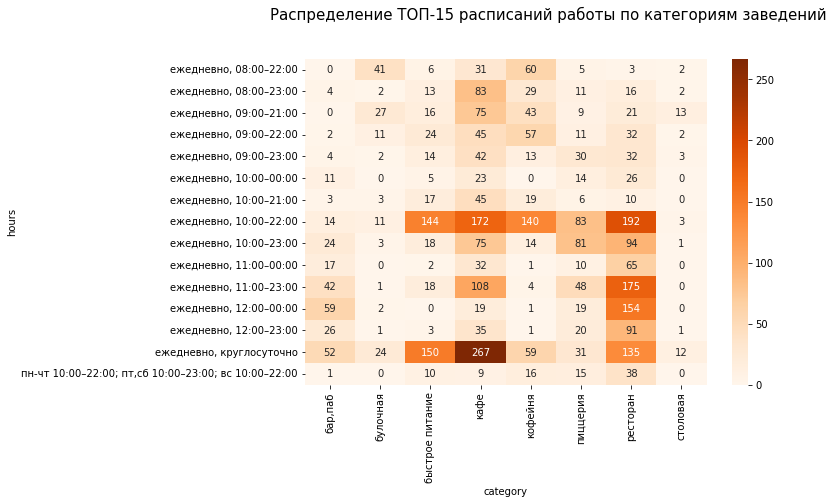

In [157]:
fig, ax = plt.subplots(figsize=(9, 6))
df_top_time = data.query('hours in @top_hours').pivot_table(index='hours',columns='category',values='name',
                                        aggfunc='count', fill_value=0)
sns.heatmap(df_top_time, annot=True, fmt='.0f', cmap='Oranges', ax=ax)
fig.suptitle('Распределение ТОП-15 расписаний работы по категориям заведений', y=1,fontsize=15)
plt.show()

Рассмотрим зависимость числа круглосуточно работающих по районам и категориям.

In [158]:
hours_top_['is_24/7'].count()

3861

In [159]:
hours_top_['is_24/7'].value_counts()

False    3131
True      730
Name: is_24/7, dtype: int64

In [160]:
hours_top_.loc[hours_top_.loc[:,'is_24/7']==True]['is_24/7'].count()

730

Оставляем только круглосуточно работающие заведения, их -730.

In [161]:
hours_top_=hours_top_.loc[hours_top_.loc[:,'is_24/7']==True]

In [162]:
ht_=hours_top_.groupby(['district','category'],as_index=False).agg(count_object=('is_24/7','count'))\
.sort_values(by='count_object',ascending=False)
ht.head(10)

,district,category,hours,count_object
438,Центральный административный округ,ресторан,"ежедневно, 12:00–00:00",86
387,Центральный административный округ,кафе,"ежедневно, 08:00–23:00",53
437,Центральный административный округ,ресторан,"ежедневно, 11:00–23:00",49
480,Юго-Восточный административный округ,кафе,"ежедневно, круглосуточно",48
439,Центральный административный округ,ресторан,"ежедневно, 12:00–23:00",44
294,Северо-Восточный административный округ,ресторан,"ежедневно, 10:00–22:00",37
644,Южный административный округ,ресторан,"ежедневно, 10:00–22:00",35
434,Центральный административный округ,ресторан,"ежедневно, 10:00–22:00",35
553,Юго-Западный административный округ,кафе,"ежедневно, круглосуточно",34
41,Восточный административный округ,кафе,"ежедневно, круглосуточно",33


Строим столбчатую диаграмму.

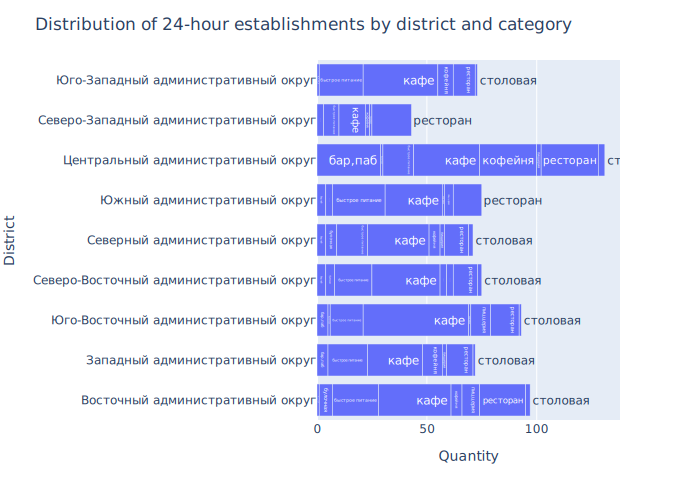

In [163]:

fig = px.bar(ht_.sort_values(by='category', ascending=True), 
             x='count_object', 
             y='district', 
             text='category'
            )

fig.update_layout(title='Distribution of 24-hour establishments by district and category',
                   xaxis_title='Quantity',
                   yaxis_title='District')
fig.show() 

Среди круглосуточно работающих заведений во всех администратичных округах чаще всего встречаются кафе, рестораны, быстрое питание. В Центральном округе также часто встречаются круглосуточные паб,бары и кофейни.

****Выводы:****

**1.Исследование объектов общественного питания по категориям:**
*Заведения общественного питания в Москве делятся на 8 категорий - кафе; ресторан; кофейня; бар,паб; пиццерия, быстрое питание, столовая и булочная. Наибольшее количество объектов относится к категории кафе - 2378 заведения или 28.29% от общего числа 8406. К категории ресторан относится 2043 заведения или 24.3%, кофейня - 1413 или 16.8%, бар,паб - 765 или 9.1%, пиццерия -633 или 7.53%, быстрое питание - 603 или 7.17%, столовая - 315 или 3.7%. Наименьшее количество заведений относится к категории булочная и составляет 256 заведений или 3% от общего числа заведений.*


**2.Исследование количества посадочных мест по категориям:**
*Чаще всего встречаются заведения с количесвом посадочных мест 40 - 253 объекта, 100 - 213, 60 -175, 50 - 168, 80 - 160. Минимальное количество посадочных мест -0, максимальное -1288. Заведения общественного питания, где нет посадочных мест - 136. В основном это булочные, небольшие кафе и кофейни. Заведений с количеством посадочных мест 1288 - 11. Все они расположены на пр. Вернадского.Возможно, при подсчете посадочных мест были посчитаны возможности по приему гостей при проведении фуршетных мероприятий. Заведений с числом посадочных мест более 300 - 449. Скорее всего это большие заведения с несколькими банкетными залами.*

*По среднему количеству посадочных мест лидируют категории бар,паб -125, ресторан -122. Учитывая имеющиеся в данных выбросы -0 и 1288, объективнее рассматривать медианные значения. Наибольшее количество посадочных мест по медианному значению приходится на категорию рестораны. Среднее значение для данной категории -122 посадочных места, медианное значение - 86, количество объектов данной категории, имеющих посадочные места - 1270. Для категории бар, паб среднее значение -125, медианное - 83, количество заведений - 468. Наименьшее количество посадочных мест - в зачедениях категории булочная. Для данной категории среднее значение - 89, медианное -50, количество заведений - 148. Москва крупный мегаполис с большим количеством жителей и гостей города, поэтому преобладают заведения со средними значениями посадочных мест от 89 до 125 в зависимости от категории, медианные от 50 до 86. Учитывая, что существуют заведения без посадочных мест и заведения с количеством посадочных мест более 300, видим существенную разницу между средними и медианными значениями.*

**3.Соотношение сетевых и несетевых заведений:**
*В сгруппированных по сетям данных есть группы, в которые входит только одно заведение. Возможно, это результат технического сбоя или человеческий фактор. Также можно предположить, что в Москве находится только одно заведение сети, и есть еще в других регионах. Значения, где в сеть в рассматриваемом датафрейме входит только одно заведение, удаляем.* 

*Количество сетевых заведений составляет 3141 объектов или 37.4%, несетевых - 5265 или 62.6%.*

**4.Какие категории заведений чаще являются сетевыми:**
*Категории заведений общественного питания, которые чаще всего являются сетевыми - кафе (749 сетевых кафе, что составляет 23.85% от общего числа сетевых заведений 3141, 31.5% от общего числа заведений категории кафе 2378 и 8.91% от общего числа заведений всех категорий 8406), рестораны (721 сетевых ресторанов или 22.95% от общего числа сетевых заведений, 35.29% от числа ресторанов, 8.58% от заведений всех категорий), кофейни (714 сетевых кофеен или 22.73% от сетевых заведений, 50.53% от числа всех кофеен, 8.49% от числа всех заведений.*

*Реже всего сетевыми заведениями являются столовые. Только 85 столовых являются сетевыми, что составляет 2.71% от числа сетевых заведений, 26.98% от числа столовых и 1.01% от всех заведений.* 

*Сетевыми от общего числа заведений своей категории столовые составляют 60.94%, рестораны- 51.34%, пиццерии -50.53%, кофейни - 37.65%, кафе -35.29%, заведения быстрого питания -31.5%, булочные - 26.98% и бар,пабы -21.44%.*

**5.Исследование наиболее популярных сетей Москвы:**
*В ТОП-15 вошли следующие сети: Шоколадница-120 заведений, Домино'с Пицца-76, Додо Пицца -74, Яндекс Лавка -72, One Price Coffee - 71, Cofix- 65, Prime - 50, Хинкальная-44, КОФЕПОРТ-42, Кулинарная лавка братьев Караваевых-39, Теремок-38, Чайхана-37, CofeFest -32, Буханка - 32, Му-Му -27. Это в большинстве своем известные сети, имеющие заведения не только в Москве, но и во многих регионах России. В то же время в сгруппированных по сетям данных есть группы, в которые входит только одно заведение. Возможно, это результат технического сбоя или человеческий фактор. Также можно предположить, что в Москве находится только одно заведение сети, и есть еще в других регионах. Значения, где в сеть в рассматриваемом датафрейме входит только одно заведение, удаляем.* 

*Всего в выявленныx ТОП-15 сетей входит 819 заведений. Наибольшее количество заведений относится к категории кофеен - 336 или 41% от числа заведений ТОП-15 сетей. Наименьшее количество - к категории столовая - 2 заведения или 0.2%. Для ТОП-15 сетей характерны следующие медианные и средние значения: количество посадочных мест -75-медианное, 110 - среднее, рейтинг - 4.2 и 4.1, число с оценкой среднего чека - 415.0 и 471.56, число с оценкой одной чашки капучино -97.50 и 170.62 соответственно. Прослеживается доступность среднего чека и достаточно большое количество посадочных мест, но предполагаю, что основные площади без банкетных залов. По количеству посадочных мест ТОП-15 сетей наибольшее количество у сети Му-Му. В данную сеть входят 1 пиццерия с количеством посадочных мест -300, 2 заведения быстрого питания с 300 посадочными местами, 1 бар,паб - 195, 12 кафе - по 150, 8 ресторанов по 135, 2 кофейни по 120 и 1 столовая с 60 посадочными местами. Большинство сетей из ТОП-15 приходится на Центральный административный округ: 94 кофейни,60 ресторанов и 47 кафе, в то же время, только 1 столовая, 1 булочная, 1 паб,бар, 2 заведения быстрого питания, 9 пиццерий. Наибольшее количество сетевых заведений - кафе, рестораны и кафетерии во всех административных округах. Столовые, паб,бар, булочные -этих категорий наименьшее количество по всем округам.*

**6.Анализ заведений по административным районам Москвы:**
*По административным районам Москвы заведения общественного питания распределяются следующим образом: наибольшее количество заведений расположено в Центральном административном округе - 2242 или 26,67% от числа всех заведений, в Северном административном округе - 900 или 9.7%, в Южном административном округе -892 или 10.61%, в Северо-Восточном - 891 или 10.6%, в Западном -851 -10.12%, в Восточном -798 - 9.49%, в Юго-Восточном -714 - 8.49%, в Юго-Западном - 709 - 8.43% и наименьшее количество заведений - в Северо-Западном - 409 - 4.86%.*

*Наибольшее количество заведений общественного питания в Москве по административным округам по категориям распределяется следующим образом: Центальный административный округ - рестораны -670 заведений, кафе - 464, кофейни -428, паб,бар - 364; Юго_Восточный - кафе -282, Восточный - кафе -272, Северо_Восточный - кафе -269, Южный - кафе -264, Западный - кафе - 239, Юго-Западный - кафе -238. Наиболее многочисленными являются заведения категории кафе.*

*Наименьшее количество заведений по административным округам по категориям распределяются: Северо-Западный административный округ - булочная -12, Юго-Восточный - булочная -13, столовая - 25, Юго-Западный - столовая -17, булочная - 27, Северо-Западный - столовая -18, паб,бар - 23, Западный - столовая -24, Восточный - булочная -25, Южный - булочная -25. Самыми самочисленными являются заведения категории булочная и столовая.*

*В Восточном административном округе наибольшее количество заведений относится к категории кафе, что составляет 34.1% от числа заведений в округе, наименьшее - к категории булочная - 3.1%, в Центральном - рестораны -29.9%, булочные 2.2%, в Северо-Восточном - кафе - 30.2%, булочные -3.1%, в Юго-Восточном - кафе - 39.5%, булочные - 1.8%, в Северном - кафе -26.1%, булочные - 4.3%, в Юго-Западном - кафе - 33.6%, столовые - 2.4%, в Западном - кафе - 28.1%, столовые - 2.8%, в Северо-Западном - кафе - 28.1%, булочные - 2.9%, в Южном - кафе -29.5%, булочные - 2.8% соответственно.*

**7.Распределение средних рейтингов по категориям заведений:**
*Средние рейтинги незначительно отличаются в зависимости от категории заведения. Самый высокий средний рейтинг у категории бар,паб - 4.38, самый низкий - у категории быстрое питание -4.05.Средние и медианные значения отличаются незначительно и не показывают большой зависимости от категории заведения.*

**8.Фоновая картограмма со средним рейтингом заведений районов Москвы:**
*Построена фоновая картограмма хороплет с помощью конструктора Choropleth.*

**9.Отображение всех заведений на карте с помощью кластеров:**
*На карте отображены все заведения с помощью кластеров.*

**10.Анализ топ-15 улиц по количеству заведений:**
*Наибольшее количество заведений находится на проспекте Мира - 184, Профсоюзной улице - 122, проспекте Вернадского -108, Ленинской проспекте -107, Ленинградском проспекте -95, Дмитровском шоссе - 88, Каширском шоссе - 77, Варшавском шоссе - 76, Ленинградском шоссе -70, МКАД -65, Люблинской улице -60, улице Вавилова -55, Кутузовском проспекте - 54, улице Миклухо-Маклая - 49, Пятницкой улице -48.*

*На ТОП-15 улицах расположено 1258 заведений общественного питания: 353 кафе, 327 ресторана, 220 кофеен, 117 заведений быстрого питания, 91 бар,паба, 84 пиццерии, 40 столовых и 26 булочных.Тенденция при рассмотрении расположения заведений на ТОП-15 улицах сохраняется такое же, как и по администратичным округам. Наибольшее количество заведений относится к категориям кафе, ресторан и кофейня. Наименьшее - к категории булочная и столовая.*

**11.Рассмотрим улицы, на которых находится только один объект общепита:**
*Улицы, на которых находится только одно заведение общественного питания, делятся по округам следующим образом: в Центральном административной округе находится 145 улиц, в Северо_Восточном - 55, Восточном -52, Северном -52, Южном -43, Юго-Восточном -39, Западном -35, Северо-Западном -19, Юго-Западном -18. Большинство улиц с одним заведением находятся в Центральном административном округе -145 из 458 (31.66%). Возможно, это всязано с тем, что в центре много маленьких тихих улиц и переулков, где нет большого траффика машин и пешеходов, как на более крупных улицах.*

**12.Анализ средних чеков заведений:**
*В Центральном административном округе самый высокий чек по городу -медианное значение -1191 рублей. Также высокий средний чек в Западном -1053 и Северном административном округе - 928. Самый низкий чек - в Юго-Восточном - 654, Северо-Восточном -717 и Юго-Западном административном округе - 793 рублей. Общая тенденция - средний чек снижается в зависимости от удаленности заведения от центра.*

**13.Анализ зависимости часов работы заведений от расположения и категории заведения:**
*Из ТОП-15 самых распространенных расписаний работы заведений все заведения работают в ежедневном режиме без выходных. Есть группа круглосуточных заведений, их 730. Остальные работают в разные часы: 759 заведений - с 10:00 до 22:00, 396 - с 11:00 до 23:00, 310 - с 10:00 до 23:00, 254 - с 12:00 до 0:00, 204 - с 9:00 до 21:00, 184 - с 9:00 до 22:00, 178 - с 12:00 до 23:00, 160 - с 8:00 до 23:00, 148 - с 8:00 до 22:00, 140 - с 9:00 до 23:00, 127 - с 11:00 до 00:00, 103 - с 10:00 до 21:00, 79 - с 10:00 до 00:00, а 89 меняют часы работы в зависимости от дней недели - в выходные дни работают дольше.*

*Чаще всего встречаются заведения общественного питания, расположенные в Центральном административном округе - рестораны, работающие ежедневно с 12:00 до 00:00 - 86 заведений, работающие ежедневно с 11:00 до 23:00 - 49 заведений и работающие ежедневно с 12:00 до 23:00 - 44 заведения,кафе, работающие ежедневно с 08:00 до 23:00 - 53 заведения. В Юго-Восточном округе - кафе, работающие ежедневно и круглосуточно - 48 заведений. Большинство заведений из ТОП-15 работают круглосуточно, либо до 23:00 - 00:00 часов.*

*Среди круглосуточно работающих заведений во всех администратичных округах чаще всего встречаются кафе, рестораны, быстрое питание. В Центральном округе также часто встречаются круглосуточные паб,бары и кофейни.*

<a id='coffee_house'>
4. Исследование на предмет открытия кофейни
</a>

<a id='district_coffee_house'>
4.1 В каких районах расположены кофейни и особенности их расположения
</a>


Посчитаем количество заведений категории кофейня.

In [164]:
data[data['category']=='кофейня']['category'].count()

1413

In [165]:
data_cof=data[data['category']=='кофейня']
data_cof.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,False,улица Маршала Федоренко
25,В парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,False,парк Левобережный
45,9 Bar Coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,False,Коровинское шоссе
46,CofeFest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,False,улица Маршала Федоренко
52,Cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,False,улица Дыбенко


Посмотрим распределение кофеен по районам.

In [166]:
data_cof['district'].value_counts()

Центральный административный округ         428
Северный административный округ            193
Северо-Восточный административный округ    159
Западный административный округ            150
Южный административный округ               131
Восточный административный округ           105
Юго-Западный административный округ         96
Юго-Восточный административный округ        89
Северо-Западный административный округ      62
Name: district, dtype: int64

Кофейни по районам распределяются следующим образом: 428 в Центральном административном округе (30.29%), 193 - в Северном (13.66%), 159 - в Северо-Восточном (11.25%), 150 - в Западном (10.63%), 131 - в Южном (9.27%), 105 - в Восточном (7.43%), 96 -в Юго-Западном (6.79%), 89 - в Юго-Восточном (6.3%) и 62 - в Северо-Западном (4.38%).

In [167]:
cof_total=data_cof['name'].count()
cof= pd.DataFrame()
cof['district_count']=data_cof.groupby('district')['name'].count()
cof['district_total_perc']=round(cof['district_count']/cof_total*100,2)
cof.sort_values('district_total_perc', ascending = False)  

,district_count,district_total_perc
district,,
Центральный административный округ,428,30.29
Северный административный округ,193,13.66
Северо-Восточный административный округ,159,11.25
Западный административный округ,150,10.62
Южный административный округ,131,9.27
Восточный административный округ,105,7.43
Юго-Западный административный округ,96,6.79
Юго-Восточный административный округ,89,6.30
Северо-Западный административный округ,62,4.39


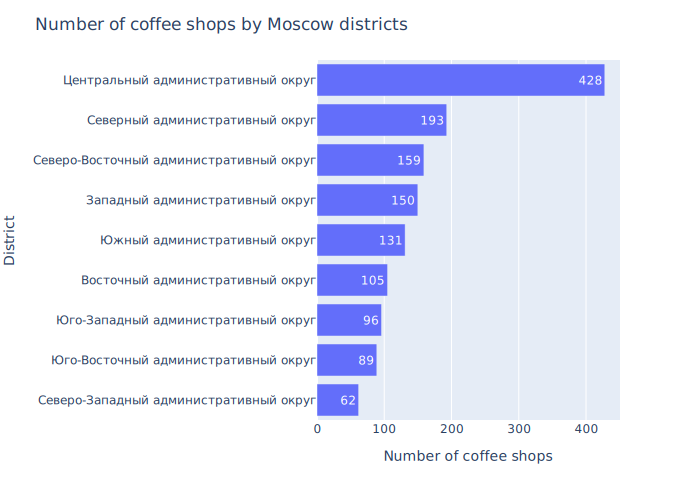

In [168]:
cof_=data_cof.groupby(['district'],as_index=False).agg(count_object=('name','count'))\
.sort_values(by='count_object',ascending=False)
fig = px.bar(cof_.sort_values(by='count_object', ascending=True), 
             x='count_object', 
             y='district', 
             text='count_object'
            )

fig.update_layout(title='Number of coffee shops by Moscow districts',
                   xaxis_title='Number of coffee shops',
                   yaxis_title='District')
fig.show() 

Сгруппируем данные по кофейням по улицам расположения.

In [169]:
data_cof['street'].value_counts()

 проспект Мира               36
 Ленинградский проспект      25
 Ленинский проспект          23
 Профсоюзная улица           18
 проспект Вернадского        16
                             ..
 Карамышевская набережная     1
 3-й Силикатный проезд        1
 Крылатская улица             1
 Молодогвардейская улица      1
 Чонгарский бульвар           1
Name: street, Length: 629, dtype: int64

Наибольшее количество кофеен расположено на проспекте Мира - 36, Ленинградском проспекте - 25, Ленинском проспекте -23, Профсоюзной улице -18, Каширском шоссе -16.

Сгруппируем по районам и улицам.

In [170]:
cof=data_cof.groupby(['district','street'],as_index=False).agg(count_object=('street','count'))\
.sort_values(by='count_object',ascending=False)
cof.head()

,district,street,count_object
151,Северный административный округ,Ленинградский проспект,25
245,Северо-Восточный административный округ,проспект Мира,19
566,Юго-Западный административный округ,Профсоюзная улица,18
557,Юго-Западный административный округ,Ленинский проспект,18
467,Центральный административный округ,проспект Мира,17


Наибольшее количество кофеен расположены: 25 - на Ленинском проспекте Северного административного округа, 19 - на проспекте Мира Северо-Восточного, 18 - на Профсоюзной улице и 18 - на Ленинском проспекте Юго-Западного округа, 17 - на проспекте Мира Центрального округа.

Данные по кофейням на проспекте Мира встречаются и в Северо-Восточном и в Центральном административном округе.

Посмотрим срез данных по заведениям на проспекте Мира по районам.

In [171]:
data[(data.street==' проспект Мира')&(data.category=='кофейня')&(data.district=='Центральный административный округ')]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
2160,Point 242,кофейня,"Москва, проспект Мира, 61",Центральный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.785840,37.634606,4.7,NaN,Цена чашки капучино:от 230 ₽,NaN,230.0,1,45.0,False,проспект Мира
2202,Udcкафе,кофейня,"Москва, проспект Мира, 26, стр. 1",Центральный административный округ,"пн-пт 08:00–23:00; сб,вс 09:00–23:00",55.777489,37.632838,4.3,средние,Средний счёт:700–1000 ₽,850.0,NaN,1,200.0,False,проспект Мира
2219,Yumbaker Gardens,кофейня,"Москва, проспект Мира, 26, стр. 1",Центральный административный округ,"ежедневно, 09:00–21:00",55.777957,37.632959,4.7,NaN,NaN,NaN,NaN,0,200.0,False,проспект Мира
2221,Дарбарс,кофейня,"Москва, проспект Мира, 79",Центральный административный округ,"ежедневно, 12:00–00:00",55.790572,37.634272,4.4,средние,Средний счёт:900–1100 ₽,1000.0,NaN,0,60.0,False,проспект Мира
2273,"Skuratov, coffee roasters",кофейня,"Москва, проспект Мира, 26, стр. 1",Центральный административный округ,"ежедневно, 06:55–22:05",55.778069,37.633034,4.3,NaN,NaN,NaN,NaN,1,200.0,False,проспект Мира
2285,Шоколадница,кофейня,"Москва, проспект Мира, 77к1",Центральный административный округ,"пн-пт 08:00–23:00; сб,вс 10:00–23:00",55.789963,37.634488,4.2,NaN,NaN,NaN,NaN,1,NaN,False,проспект Мира
2291,Surf Coffee x Lovely,кофейня,"Москва, проспект Мира, 40",Центральный административный округ,"пн-пт 08:00–23:00; сб,вс 10:00–23:00",55.780288,37.634008,4.5,средние,Цена чашки капучино:от 169 ₽,NaN,169.0,0,36.0,False,проспект Мира
2306,Он мой,кофейня,"Москва, проспект Мира, 45",Центральный административный округ,"пн-пт 07:30–19:30; сб,вс 10:30–19:30",55.782815,37.633718,4.9,NaN,NaN,NaN,NaN,0,6.0,False,проспект Мира
2313,Кафетериус,кофейня,"Москва, проспект Мира, 26, стр. 5",Центральный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",55.777268,37.634337,4.3,NaN,NaN,NaN,NaN,1,54.0,False,проспект Мира
2330,Madam Yen,кофейня,"Москва, проспект Мира, 40",Центральный административный округ,"ежедневно, 10:00–23:00",55.779987,37.633564,4.2,средние,Средний счёт:450–550 ₽,500.0,NaN,0,36.0,False,проспект Мира


In [172]:
len(data[(data.street==' проспект Мира')&(data.category=='кофейня')&(data.district=='Центральный административный округ')])

17

In [173]:
data[(data.street==' проспект Мира')&(data.category=='кофейня')&(data.district=='Северо-Восточный административный округ')]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
960,Vigor Maker,кофейня,"Москва, проспект Мира, 119, стр. 227",Северо-Восточный административный округ,"пн-пт 08:30–21:00; сб,вс 10:00–21:00",55.825921,37.636862,4.4,средние,Цена чашки капучино:200–250 ₽,NaN,225.0,0,NaN,False,проспект Мира
986,Mosweet,кофейня,"Москва, проспект Мира, 211, корп. 2",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.845872,37.660937,4.4,NaN,NaN,NaN,NaN,0,273.0,False,проспект Мира
1019,LeoCoffee,кофейня,"Москва, проспект Мира, 119, стр. 501",Северо-Восточный административный округ,пн-пт 08:00–22:15; сб 08:00–23:00; вс 08:00–22:00,55.836283,37.626210,4.3,средние,Цена чашки капучино:140–220 ₽,NaN,180.0,0,NaN,False,проспект Мира
1057,Cofix,кофейня,"Москва, проспект Мира, 211к2",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.845950,37.661094,4.1,NaN,Цена чашки капучино:от 60 ₽,NaN,60.0,1,NaN,False,проспект Мира
1101,Кофе-пойнт Техноград,кофейня,"Москва, проспект Мира, 119, стр. 63",Северо-Восточный административный округ,"пн-пт 10:00–19:00; сб,вс 11:00–20:00",55.834948,37.631908,4.2,NaN,NaN,NaN,NaN,0,NaN,False,проспект Мира
1119,Шоколадница,кофейня,"Москва, проспект Мира, 119, стр. 23",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.832547,37.618962,3.9,выше среднего,Средний счёт:1000–1500 ₽,1250.0,NaN,1,NaN,False,проспект Мира
1120,Cafe 55,кофейня,"Москва, проспект Мира, 119, стр. 55",Северо-Восточный административный округ,"ежедневно, 10:00–20:00",55.835176,37.622926,4.1,NaN,NaN,NaN,NaN,0,NaN,False,проспект Мира
1131,КОФЕПОРТ,кофейня,"Москва, проспект Мира, 119, стр. 7",Северо-Восточный административный округ,"ежедневно, 10:00–21:00",55.827676,37.626779,4.0,NaN,Цена чашки капучино:90–100 ₽,NaN,95.0,1,80.0,False,проспект Мира
1142,Cinnabon,кофейня,"Москва, проспект Мира, 211к2",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.845581,37.661306,2.6,NaN,NaN,NaN,NaN,1,NaN,False,проспект Мира
1149,Coffee&Croissant,кофейня,"Москва, проспект Мира, 119, стр. 525",Северо-Восточный административный округ,"ежедневно, 09:00–21:00",55.831099,37.625172,4.1,NaN,NaN,NaN,NaN,0,NaN,False,проспект Мира


In [174]:
len(data[(data.street==' проспект Мира')&(data.category=='кофейня')&(data.district=='Северо-Восточный административный округ')])

19

На срезах видно, что кофейни на проспекте Мира, расположеные до 79 дома относятся к Центральному округу, после - к Северо-Восточному. 

Рассмотрим распределение кофеен по района и улицам, на которых расположено 5 и более кофеен. 

In [175]:
cof_top=data_cof.groupby(['district','street'],as_index=False).agg(count_object=('street','count'))\
.sort_values(by='count_object',ascending=False).query('count_object>=5')

In [176]:
len(data_cof.groupby(['district','street'],as_index=False).agg(count_object=('street','count'))\
.sort_values(by='count_object',ascending=False).query('count_object>=5'))

61

Улиц, на которых расположено 5 и более кофеен - 61.

Построим столбчатую диаграмму.

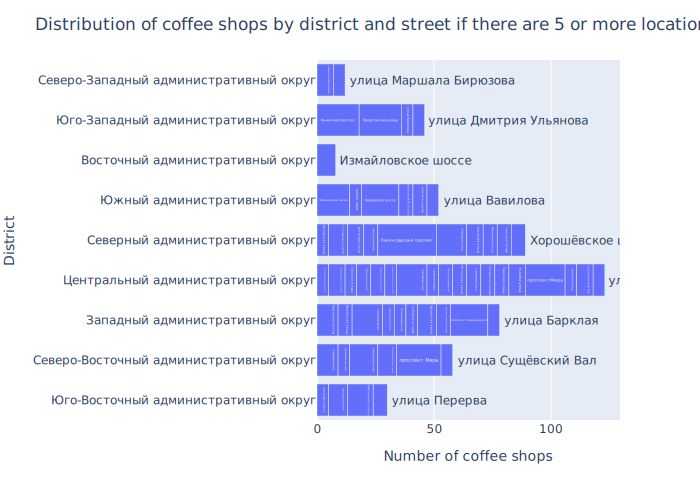

In [177]:
fig = px.bar(cof_top.sort_values(by='street', ascending=True), 
             x='count_object', 
             y='district', 
             text='street'
            )

fig.update_layout(title='Distribution of coffee shops by district and street if there are 5 or more locations',
                   xaxis_title='Number of coffee shops',
                   yaxis_title='District')
fig.show() 

Есть улицы, на которых расположена только одна кофейня.

In [178]:
cof_one=data_cof.groupby(['district','street'],as_index=False).agg(count_object=('street','count'))\
.sort_values(by='count_object',ascending=False).query('count_object==1')
cof_one

,district,street,count_object
414,Центральный административный округ,Ольховская улица,1
632,Южный административный округ,набережная Марка Шагала,1
406,Центральный административный округ,Никольская улица,1
437,Центральный административный округ,Селивёрстов переулок,1
577,Юго-Западный административный округ,улица Академика Волгина,1
...,...,...,...
270,Северо-Западный административный округ,Волоколамское шоссе,1
269,Северо-Западный административный округ,Вишнёвая улица,1
268,Северо-Западный административный округ,Авиационная улица,1
266,Северо-Западный административный округ,3-й Силикатный проезд,1


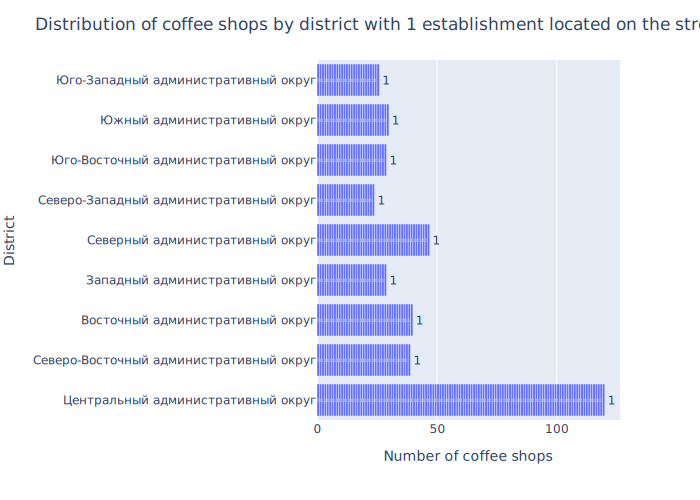

In [179]:
fig = px.bar(cof_one.sort_values(by='count_object', ascending=True), 
             x='count_object', 
             y='district', 
             text='count_object'
            )

fig.update_layout(title='Distribution of coffee shops by district with 1 establishment located on the street',
                   xaxis_title='Number of coffee shops',
                   yaxis_title='District')
fig.show() 

In [180]:
len(data_cof.groupby(['district','street'],as_index=False).agg(count_object=('street','count'))\
.sort_values(by='count_object',ascending=False).query('count_object==1'))

384

Улиц, на которых расположена только одна кофейня - 384, что составляет 27.2% от общего числа кофеен 1413.

<a id='hours_all_day'>
4.2 Исследование кофеен, работающих круглосуточно
</a>

Посчитаем количество кофеен, которые работают круглосуточно.

In [181]:
cof_is_24=data_cof['is_24/7'].value_counts()
cof_is_24

False    1354
True       59
Name: is_24/7, dtype: int64

In [182]:
total_is_24=data['is_24/7'].value_counts()
total_is_24

False    7676
True      730
Name: is_24/7, dtype: int64

In [183]:
cof_is_24_ratio=round(cof_is_24/total_is_24*100,2)
cof_is_24_ratio

False    17.64
True      8.08
Name: is_24/7, dtype: float64

Количество кофеен, работающих круглосуточно -59, что составляет 8.08% от общего числа заведений общественного питания, работающих круглосуточно.

In [184]:
data_cof.loc[data_cof.loc[:,'is_24/7']==True]['is_24/7'].count()

59

In [185]:
data_cof_=data_cof.loc[data_cof.loc[:,'is_24/7']==True]

Сгруппируем кофейни, работающие круглосуточно, по районам и по улицам.

In [186]:
cof_is_24=data_cof_.groupby(['district','street'],as_index=False).agg(count_object=('is_24/7','count'))\
.sort_values(by='count_object',ascending=False).query('count_object>=1')
cof_is_24.head(10)

,district,street,count_object
24,Центральный административный округ,Комсомольская площадь,3
4,Западный административный округ,Кутузовский проспект,3
42,Юго-Западный административный округ,Ленинский проспект,2
1,Восточный административный округ,Зелёный проспект,2
32,Центральный административный округ,Павелецкая площадь,2
16,Северо-Восточный административный округ,Ярославское шоссе,2
27,Центральный административный округ,Кудринская площадь,2
13,Северный административный округ,Ленинградский проспект,2
43,Юго-Западный административный округ,Ленинский проспект (дублёр),1
41,Юго-Восточный административный округ,Люблинская улица,1


In [187]:
len(data_cof_.groupby(['district','street'],as_index=False).agg(count_object=('is_24/7','count'))\
.sort_values(by='count_object',ascending=False))

49

In [188]:
cof_is_24_=data_cof_.groupby(['district'],as_index=False).agg(count_object=('is_24/7','count'))\
.sort_values(by='count_object',ascending=False)
cof_is_24_.head(10)

,district,count_object
5,Центральный административный округ,26
1,Западный административный округ,9
7,Юго-Западный административный округ,7
0,Восточный административный округ,5
2,Северный административный округ,5
3,Северо-Восточный административный округ,3
4,Северо-Западный административный округ,2
6,Юго-Восточный административный округ,1
8,Южный административный округ,1


По административным округам круглосуточно работающие кофейни распределились следующим образом: в Центральном - 26 кофеен, в Западном - 9, в Юго-Западном -7, в Восточном и Северном - по 5, в Северо-Восточном -3, в Северо-Западном -2, в Юго-Восточном и Южном - по 1. Наибольшее количество расположено в Центральном административном округе.

По улицам в административных округах по 2-3 круглосуточно работающие кофейни расположены: Центральный административный округ-Комсомольская площадь-3, Павелецкая площадь-2 и Кудринская площадь-2 кофейни, Западный -Кутузовский проспект-3, Северо-Восточный -Ярославское шоссе-2 и Зелёный проспект-2, Северный-Ленинградский проспект-2, Юго-Западный-Ленинский проспект-2 кофейни. 18 круглосуточных кофеен расположены по 2-3 на крупных и оживленных улицах, из них 7 - в Центральном административном округе, остальные располагаются по 1 заведению на улице.
	

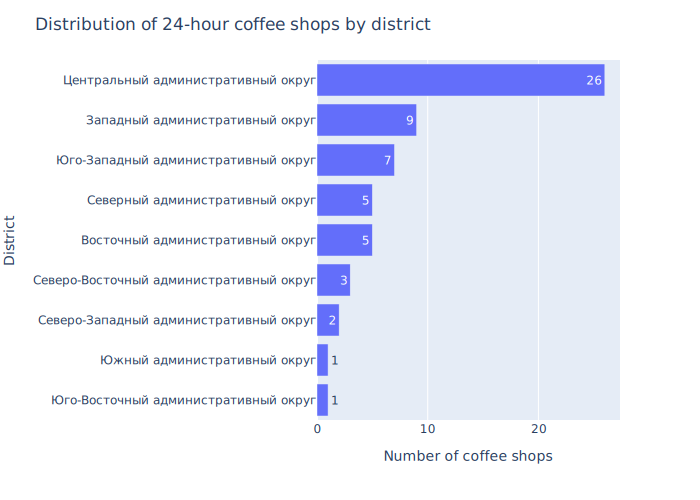

In [189]:
fig = px.bar(cof_is_24_.sort_values(by='count_object', ascending=True), 
             x='count_object', 
             y='district', 
             text='count_object'
            )

fig.update_layout(title='Distribution of 24-hour coffee shops by district',
                   xaxis_title='Number of coffee shops',
                   yaxis_title='District')
fig.show() 

<a id='rating_coffee_house'>
4.3 Рейтинги кофеен, распределение их по районам
</a>

Сгруппируем данные по кофейням в зависимости от рейтингов.

In [190]:
cof_rating=data_cof['rating'].value_counts()
cof_rating

4.3    261
4.4    228
4.2    202
4.1    170
4.5     95
4.0     78
4.7     77
4.6     61
3.9     38
5.0     37
4.9     37
4.8     29
3.8     25
3.7     19
3.4      9
3.1      7
3.6      7
3.3      7
3.2      4
3.5      4
2.3      4
2.8      3
2.0      3
2.9      3
3.0      2
1.4      1
2.6      1
2.2      1
Name: rating, dtype: int64

In [191]:
len(data_cof)

1413

In [192]:
data_cof[(data_cof.rating<=3)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
187,CofeFest,кофейня,"Москва, Инженерная улица, 3с1",Северо-Восточный административный округ,пн-пт 08:00–19:00,55.878440,37.580627,2.9,NaN,NaN,NaN,NaN,1,NaN,False,Инженерная улица
600,В парке вкуснее,кофейня,"Москва, Северный административный округ, район...",Северный административный округ,"ежедневно, 10:00–21:00",55.851985,37.478492,2.2,NaN,NaN,NaN,NaN,1,NaN,False,Северный административный округ
605,Cinnabon,кофейня,"Москва, Беломорская улица, 16А",Северный административный округ,"ежедневно, 10:00–22:00",55.862800,37.470965,2.0,NaN,NaN,NaN,NaN,1,NaN,False,Беломорская улица
608,Coffprice,кофейня,"Москва, Фестивальная улица, 2Б",Северный административный округ,"ежедневно, 10:00–22:00",55.854468,37.476547,3.0,NaN,Цена чашки капучино:100–200 ₽,NaN,150.0,1,53.0,False,Фестивальная улица
654,Monty Cafe,кофейня,"Москва, улица Адмирала Макарова, 2",Северный административный округ,"ежедневно, 08:00–22:00",55.831180,37.493618,2.3,NaN,NaN,NaN,NaN,0,NaN,False,улица Адмирала Макарова
668,Маракуйя,кофейня,"Москва, Нововладыкинский проезд, 1к4",Северо-Восточный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.850976,37.575822,1.4,NaN,NaN,NaN,NaN,0,NaN,False,Нововладыкинский проезд
1142,Cinnabon,кофейня,"Москва, проспект Мира, 211к2",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.845581,37.661306,2.6,NaN,NaN,NaN,NaN,1,NaN,False,проспект Мира
1588,КОФЕПОРТ,кофейня,"Москва, 3-я Хорошёвская улица, 2, стр. 1",Северо-Западный административный округ,пн-пт 08:00–18:30,55.777557,37.503128,2.0,NaN,Цена чашки капучино:90–100 ₽,NaN,95.0,1,85.0,False,3-я Хорошёвская улица
2482,Gold,кофейня,"Москва, Краснобогатырская улица, 2, стр. 2",Восточный административный округ,пн-пт 08:00–17:00,55.815312,37.691834,3.0,NaN,NaN,NaN,NaN,0,52.0,False,Краснобогатырская улица
5284,CofeFest,кофейня,"Москва, Гончарная улица, 23",Центральный административный округ,пн-пт 08:00–19:00,55.743056,37.649705,2.3,NaN,NaN,NaN,NaN,1,NaN,False,Гончарная улица


In [193]:
data_cof_rat=data_cof[(data_cof.rating<=3)]

In [194]:
cof_is_rating_=data_cof_rat.groupby(['district'],as_index=False).agg(count_object=('district','count'))\
.sort_values(by='count_object',ascending=False)
cof_is_rating_.head(10)

,district,count_object
6,Юго-Восточный административный округ,5
2,Северный административный округ,4
3,Северо-Восточный административный округ,3
1,Западный административный округ,2
0,Восточный административный округ,1
4,Северо-Западный административный округ,1
5,Центральный административный округ,1
7,Южный административный округ,1


In [195]:
len(data_cof[(data_cof.rating<=3)])

18

In [196]:
round(len(data_cof[(data_cof.rating<=3)])/len(data_cof['rating'])*100,2)

1.27

Рейтинги менее 3 встречается в 18 кофейнях, 5 из них находятся в Юго-Восточном административном округе, 4 - в Северном, 3- в Северо-Восточном, 2- в Западном, по 1 кофейне - в Восточном, Северо-Западном, Центральном и Южном. Кофейни с низким рейтингом составляют только 1.27% от общего числа кофеен 1413. Прямой зависимости низкого рейтинга кофеен от расположения не прослеживается.

In [197]:
data_cof['rating'].describe()

count    1413.000000
mean        4.277282
std         0.372250
min         1.400000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

In [198]:
rating_cof_avg=data_cof.pivot_table(index=['district'],values='rating',aggfunc=['count','mean','median'])
rating_cof_avg.columns=['cof_count','rating_avg', 'rating_median']
rating_cof_avg.head(10)

,cof_count,rating_avg,rating_median
district,,,
Восточный административный округ,105,4.282857,4.3
Западный административный округ,150,4.195333,4.2
Северный административный округ,193,4.291710,4.3
Северо-Восточный административный округ,159,4.216981,4.3
Северо-Западный административный округ,62,4.325806,4.3
Центральный административный округ,428,4.336449,4.3
Юго-Восточный административный округ,89,4.225843,4.3
Юго-Западный административный округ,96,4.283333,4.3
Южный административный округ,131,4.232824,4.3


In [199]:
round((4.3-4.2)/5*100,2)

2.0

В целом среднии и медианные рейтинги по административным округам отличаются незначительно. Во всех административных округах медианное значение рейтинга составляет 4.3 и только в Западном административном округе - 4.2 или 2.0% от медианного рейтинга по остальным округам. Это отклонение незначительно, поэтому можно сделать вывод, что рейтинги кофеен не зависит от расположении кофеен по округам.

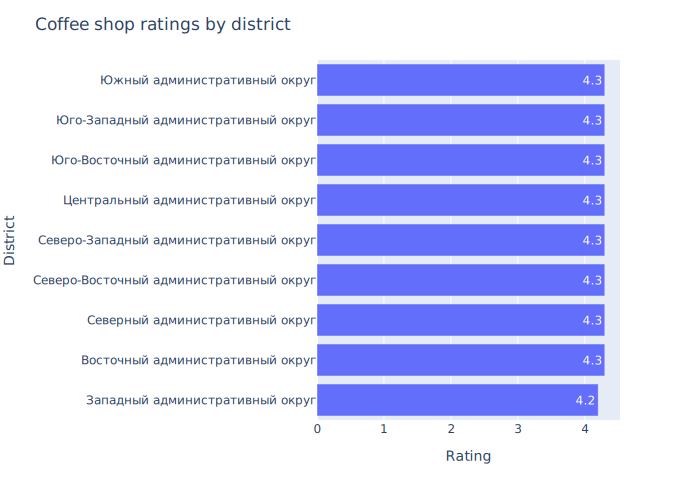

In [200]:
rating_cof=data_cof.groupby(['district'],as_index=False).agg(count_object=('rating','median'))\
.sort_values(by='count_object',ascending=False)
fig = px.bar(rating_cof.sort_values(by='count_object', ascending=True), 
             x='count_object', 
             y='district', 
             text='count_object'
            )

fig.update_layout(title='Coffee shop ratings by district',
                   xaxis_title='Rating',
                   yaxis_title='District')
fig.show() 

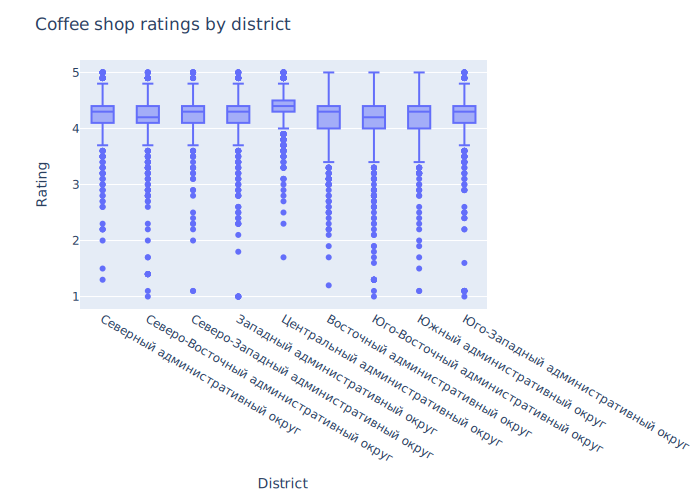

In [201]:
fig = px.box(data, 
             x='district', 
             y='rating', 
            )

fig.update_layout(title='Coffee shop ratings by district',
                   xaxis_title='District',
                   yaxis_title='Rating')
fig.show()

<a id='middle_coffee_cup'>
4.4 Анализ стоимости чашки капучино в кофейнях
</a>

Посмотрим описание данных столбца с оценкой стоимости одной чашки капучино.

In [202]:
data_cof['middle_coffee_cup'].describe()

count     521.000000
mean      175.055662
std        89.753009
min        60.000000
25%       124.000000
50%       170.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

In [203]:
data[(data.middle_coffee_cup>=1000)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,is_24/7,street
2859,Шоколадница,кофейня,"Москва, Большая Семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",55.782268,37.709022,4.2,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,1,48.0,False,Большая Семёновская улица


Значения в столбце выглядят корректно. В Шоколаднице на Большой Семеновской улице, 27, корп.1, где цена чашки капучино находится в границах 230-2907 руб. Здесь возможно некорректно указаны данные по верхней границе стоимости, возможно, указанная стоимость реальна. Наиболее корректно рассматривать медианные значения.

Рассмотри среднюю и медианную стоимость чашки капучино по районам.

In [204]:
coffee_cup_=data_cof.groupby('district')['middle_coffee_cup'].agg(['count','mean','median']).round().reset_index()
coffee_cup_.columns=['district','cof_count','cup_avg', 'cup_median']
coffee_cup_.head(10)

,district,cof_count,cup_avg,cup_median
0,Восточный административный округ,42,174.0,135.0
1,Западный административный округ,49,190.0,189.0
2,Северный административный округ,76,166.0,159.0
3,Северо-Восточный административный округ,60,165.0,162.0
4,Северо-Западный административный округ,21,166.0,165.0
5,Центральный административный округ,162,188.0,190.0
6,Юго-Восточный административный округ,34,151.0,148.0
7,Юго-Западный административный округ,34,184.0,198.0
8,Южный административный округ,43,158.0,150.0


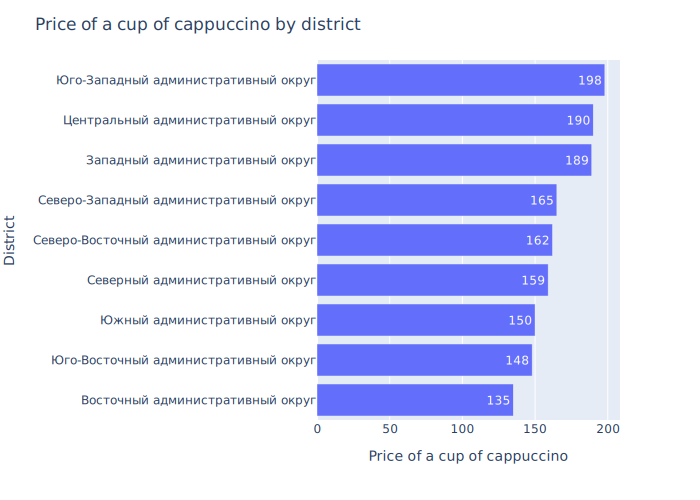

In [205]:
fig = px.bar(coffee_cup_.sort_values(by='cup_median', ascending=True), 
             x='cup_median', 
             y='district', 
             text='cup_median'                      
            )

fig.update_layout(title='Price of a cup of cappuccino by district',
                   xaxis_title='Price of a cup of cappuccino',
                   yaxis_title='District')
fig.show() 


In [206]:
round((1-135/198)*100,2)

31.82

Наибольшее медианное значение стоимости чашки капучино - Юго-Западном административном округе- 198 руб., Центральном - 190 руб., Западном - 189 руб. Наименьшее - в Восточном- 135 руб., в Юго-Восточном - 147.5 руб., в Южном - 150 руб. Разница стоимости чашки капучино в Восточном и Юго-Западном округах составляет 31.82%. Можно сделать вывод, что стоимость чашки капучино снижается при удалении заведения от центра.

Посмотрим распределение медианных значений по количеству мест в кофейнях по административным округам.

In [207]:
data_cof['seats'].describe()

count     751.000000
mean      111.199734
std       127.837772
min         0.000000
25%        40.000000
50%        80.000000
75%       144.000000
max      1288.000000
Name: seats, dtype: float64

In [208]:
cof_is_seats=data_cof.groupby(['district'],as_index=False).agg(median_object=('seats','median'))\
.sort_values(by='median_object',ascending=False)
cof_is_seats.head(10)

,district,median_object
1,Западный административный округ,96.0
4,Северо-Западный административный округ,87.5
5,Центральный административный округ,86.0
8,Южный административный округ,80.0
3,Северо-Восточный административный округ,75.0
2,Северный административный округ,66.0
7,Юго-Западный административный округ,64.5
0,Восточный административный округ,55.0
6,Юго-Восточный административный округ,50.0


****Выводы:****

**1.В каких районах расположены кофейни и особенности их расположения:**
*Кофейни по районам распределяются следующим образом: 428 в Центральном административном округе (30.29%), 193 - в Северном (13.66%), 159 - в Северо-Восточном (11.25%), 150 - в Западном (10.63%), 131 - в Южном (9.27%), 105 - в Восточном (7.43%), 96 -в Юго-Западном (6.79%), 89 - в Юго-Восточном (6.3%) и 62 - в Северо-Западном (4.38%).*

*Наибольшее количество кофеен расположено на проспекте Мира - 36, Ленинградском проспекте - 25, Ленинском проспекте -23, Профсоюзной улице -18, Каширском шоссе -16.*

*При отнесении улиц к административным округам наибольшее количество кофеен распределилось следующим образом: 25 - на Ленинском проспекте Северного административного округа, 19 - на проспекте Мира Северо-Восточного, 18 - на Профсоюзной улице и 18 - на Ленинском проспекте Юго-Западного округа, 17 - на проспекте Мира Центрального округа. Кофейни на проспекте Мира, расположеные до 79 дома относятся к Центральному округу, после - к Северо-Восточному.Улиц, на которых расположено 5 и более кофеен - 61. Улиц, на которых расположена только одна кофейня - 384, что составляет 27.2% от общего числа кофеен 1413.*

**2.Исследование кофеен, работающих круглосуточно:**

*Количество кофеен, работающих круглосуточно -59, что составляет 8.08% от общего числа заведений общественного питания, работающих круглосуточно.*

*По административным округам круглосуточно работающие кофейни распределились следующим образом: в Центральном - 26 кофеен, в Западном - 9, в Юго-Западном -7, в Восточном и Северном - по 5, в Северо-Восточном -3, в Северо-Западном -2, в Юго-Восточном и Южном - по 1. Наибольшее количество расположено в Центральном административном округе.*

*По улицам в административных округах по 2-3 круглосуточно работающие кофейни расположены: Центральный административный округ-Комсомольская площадь-3, Павелецкая площадь-2 и Кудринская площадь-2 кофейни, Западный -Кутузовский проспект-3, Северо-Восточный -Ярославское шоссе-2 и Зелёный проспект-2, Северный-Ленинградский проспект-2, Юго-Западный-Ленинский проспект-2 кофейни. 18 круглосуточных кофеен расположены по 2-3 на крупных и оживленных улицах, из них 7 - в Центральном административном округе, остальные располагаются по 1 заведению на улице.*

**3.Рейтинги кофеен, распределение их по районам:**

*Рейтинги менее 3 встречается в 18 кофейнях, 5 из них находятся в Юго-Восточном административном округе, 4 - в Северном, 3- в Северо-Восточном, 2- в Западном, по 1 кофейне - в Восточном, Северо-Западном, Центральном и Южном. Кофейни с низким рейтингом составляют только 1.27% от общего числа кофеен 1413. Прямой зависимости низкого рейтинга кофеен от расположения не прослеживается.*

*В целом среднии и медианные рейтинги по административным округам отличаются незначительно. Во всех административных округах медианное значение рейтинга составляет 4.3 и только в Западном административном округе - 4.2 или 2.0% от медианного рейтинга по остальным округам. Это отклонение незначительно, поэтому можно сделать вывод, что рейтинги кофеен не зависит от расположении кофеен по округам.*

**4.Анализ стоимости чашки капучино в кофейнях:**

*Наибольшее медианное значение стоимости чашки капучино - Юго-Западном административном округе- 198 руб., Центральном - 190 руб., Западном - 189 руб. Наименьшее - в Восточном- 135 руб., в Юго-Восточном - 147.5 руб., в Южном - 150 руб. Разница стоимости чашки капучино в Восточном и Юго-Западном округах составляет 31.82%. Можно сделать вывод, что стоимость чашки капучино снижается при удалении заведения от центра.*

**5.Рекомендации по открытию новой кофейни:**

*Возможно, стоит открыть кофейню с количеством мест меньше нижнего медианного значения (50) в одном из административных округов, где больше всего улиц с одним заведением. По результатам исследования, улицы с одним заведением, в большинстве находятся в пределах центра, поэтому такое расположение будет достаточно доступным и удобным для большинства жителей и гостей столицы. Учитывая, что количество кофеен к административных округах достаточно большое относительно общего числа заведений в округе- от 13.16% до 21.44% в зависимости от округа, при такой высокой конкуренции в этой категории заведений, стоит обратить внимание на стоимость чашки капучино в открываемой кофейне. В открываемой кофейне, на мой взгляд, стоит установить стоимость чашки капучино в пределах 135-150 руб. Эта стоимость в среднем ниже стоимости чашки капучино в заведениях, тяготеющих к центру. В то же время, стоит продумать концепцию заведения -создать свой особый неповторимый стиль заведения, который будет прослеживаться от оформления заведения, униформы работников до каких-то "фишек" в меню -например, особый десерт, который можно отведать только в данном заведении. Если такая концепция приживется, то можно будет масштабироваться в сеть.*

### Общий вывод

**При анализе заведений общественного питания Москвы выявлены следующие тенденции:**

**Заведения общественного питания в Москве делятся на 8 категорий - кафе; ресторан; кофейня; бар,паб; пиццерия, быстрое питание, столовая и булочная. Наибольшее количество объектов относится к категории кафе - 2378 заведения или 28.29% от общего числа 8406. К категории ресторан относится 2043 заведения или 24.3%, кофейня - 1413 или 16.8%, бар,паб - 765 или 9.1%, пиццерия -633 или 7.53%, быстрое питание - 603 или 7.17%, столовая - 315 или 3.7%. Наименьшее количество заведений относится к категории булочная и составляет 256 заведений или 3% от общего числа заведений.**

**Чаще всего встречаются заведения с количеством посадочных мест 40 - 253 объекта, 100 - 213, 60 -175, 50 - 168, 80 - 160. Минимальное количество посадочных мест -0, максимальное -1288. Заведения общественного питания, где нет посадочных мест - 136. В основном это булочные, небольшие кафе и кофейни. Заведений с количеством посадочных мест 1288 - 11. Все они расположены на пр. Вернадского.Возможно, при подсчете посадочных мест были посчитаны возможности по приему гостей при проведении фуршетных мероприятий. Заведений с числом посадочных мест более 300 - 449. Скорее всего это большие заведения с несколькими банкетными залами. По среднему значению посадочных мест лидирует категория бар,паб -125, ресторан-122. Учитывая наличие выбросов в данных - 0 и 1288, рассматриваем медианные значения. Наибольшее количество посадочных мест по медианному значению приходится на категорию рестораны. Среднее значение для данной категории -122 посадочных места, медианное значение - 86, количество объектов данной категории, имеющих посадочные места - 1270. Для категории бар, паб среднее значение -125, медианное - 82, количество заведений - 468. Наименьшее количество посадочных мест - в зачедениях категории булочная. Для данной категории среднее значение - 89, медианное -50, количество заведений - 148. Москва крупный мегаполис с большим количеством жителей и гостей города, поэтому преобладают заведения со средними значениями посадочных мест от 89 до 125 в зависимости от категории, медианные от 50 до 86. Учитывая, что существуют заведения без посадочных мест и заведения с количеством посадочных мест более 300, видим существенную разницу между средними и медианными значениями.**

**Количество сетевых заведений составляет 3141 объектов или 37.4%, несетевых - 5265 или 62.6%.**

**Категории заведений общественного питания, которые чаще всего являются сетевыми - кафе (749 сетевых кафе, что составляет 23.85% от общего числа сетевых заведений 3141, 31.5% от общего числа заведений категории кафе 2378 и 8.91% от общего числа заведений всех категорий 8406), рестораны (721 сетевых ресторанов или 22.95% от общего числа сетевых заведений, 35.29% от числа ресторанов, 8.58% от заведений всех категорий), кофейни (714 сетевых кофеен или 22.73% от сетевых заведений, 50.53% от числа всех кофеен, 8.49% от числа всех заведений. Реже всего сетевыми заведениями являются столовые. Только 85 столовых являются сетевыми, что составляет 2.71% от числа сетевых заведений, 26.98% от числа столовых и 1.01% от всех заведений. Сетевыми от общего числа заведений своей категории столовые составляют 60.94%, рестораны- 51.34%, пиццерии -50.53%, кофейни - 37.65%, кафе -35.29%, заведения быстрого питания -31.5%, булочные - 26.98% и бар,пабы -21.44%.**

**В ТОП-15 вошли следующие сети: Шоколадница-120 заведений, Домино'с Пицца-76, Додо Пицца -74, Яндекс Лавка -72, One Price Coffee - 71, Cofix- 65, Prime - 50, Хинкальная-44, КОФЕПОРТ-42, Кулинарная лавка братьев Караваевых-39, Теремок-38, Чайхана-37, CofeFest -32, Буханка - 32, Му-Му -27. Это в большинстве своем известные сети, имеющие заведения не только в Москве, но и во многих регионах России. Всего в выявленныx ТОП-15 сетей входит 819 заведений. Наибольшее количество заведений относится к категории кофеен - 336 или 41% от числа заведений ТОП-15 сетей. Наименьшее количество - к категории столовая - 2 заведения или 0.2%. Для ТОП-15 сетей характерны следующие медианные и средние значения: количество посадочных мест -75-медианное, 110 - среднее, рейтинг - 4.2 и 4.1, число с оценкой среднего чека - 415.0 и 471.56, число с оценкой одной чашки капучино -97.50 и 170.62 соответственно. Прослеживается доступность среднего чека и достаточно большое количество посадочных мест, но предполагаю, что основные площади без банкетных залов. По количеству посадочных мест ТОП-15 сетей наибольшее количество у сети Му-Му. В данную сеть входят 1 пиццерия с количеством посадочных мест -300, 2 заведения быстрого питания с 300 посадочными местами, 1 бар,паб - 195, 12 кафе - по 150, 8 ресторанов по 135, 2 кофейни по 120 и 1 столовая с 60 посадочными местами. Большинство сетей из ТОП-15 приходится на Центральный административный округ: 94 кофейни,60 ресторанов и 47 кафе, в то же время, только 1 столовая, 1 булочная, 1 паб,бар, 2 заведения быстрого питания, 9 пиццерий. Наибольшее количество сетевых заведений - кафе, рестораны и кафетерии во всех административных округах. Столовые, паб,бар, булочные -этих категорий наименьшее количество по всем округам.**

**По административным районам Москвы заведения общественного питания распределяются следующим образом: наибольшее количество заведений расположено в Центральном административном округе - 2242 или 26,67% от числа всех заведений, в Северном административном округе - 900 или 9.7%, в Южном административном округе -892 или 10.61%, в Северо-Восточном - 891 или 10.6%, в Западном -851 -10.12%, в Восточном -798 - 9.49%, в Юго-Восточном -714 - 8.49%, в Юго-Западном - 709 - 8.43% и наименьшее количество заведений - в Северо-Западном - 409 - 4.86%. Наибольшее количество заведений общественного питания в Москве по административным округам по категориям распределяется следующим образом: Центальный административный округ - рестораны -670 заведений, кафе - 464, кофейни -428, паб,бар - 364; Юго_Восточный - кафе -282, Восточный - кафе -272, Северо_Восточный - кафе -269, Южный - кафе -264, Западный - кафе - 239, Юго-Западный - кафе -238. Наиболее многочисленными являются заведения категории кафе. Наименьшее количество заведений по административным округам по категориям распределяются: Северо-Западный административный округ - булочная -12, Юго-Восточный - булочная -13, столовая - 25, Юго-Западный - столовая -17, булочная - 27, Северо-Западный - столовая -18, паб,бар - 23, Западный - столовая -24, Восточный - булочная -25, Южный - булочная -25. Самыми самочисленными являются заведения категории булочная и столовая. В Восточном административном округе наибольшее количество заведений относится к категории кафе, что составляет 34.1% от числа заведений в округе, наименьшее - к категории булочная - 3.1%, в Центральном - рестораны -29.9%, булочные 2.2%, в Северо-Восточном - кафе - 30.2%, булочные -3.1%, в Юго-Восточном - кафе - 39.5%, булочные - 1.8%, в Северном - кафе -26.1%, булочные - 4.3%, в Юго-Западном - кафе - 33.6%, столовые - 2.4%, в Западном - кафе - 28.1%, столовые - 2.8%, в Северо-Западном - кафе - 28.1%, булочные - 2.9%, в Южном - кафе -29.5%, булочные - 2.8% соответственно.**

**Кофейни по районам распределяются следующим образом: 428 в Центральном административном округе (30.29%), 193 - в Северном (13.66%), 159 - в Северо-Восточном (11.25%), 150 - в Западном (10.63%), 131 - в Южном (9.27%), 105 - в Восточном (7.43%), 96 -в Юго-Западном (6.79%), 89 - в Юго-Восточном (6.3%) и 62 - в Северо-Западном (4.38%).Наибольшее количество кофеен расположено на проспекте Мира - 36, Ленинградском проспекте - 25, Ленинском проспекте -23, Профсоюзной улице -18, Каширском шоссе -16. При отнесении улиц к административным округам наибольшее количество кофеен распределилось следующим образом: 25 - на Ленинском проспекте Северного административного округа, 19 - на проспекте Мира Северо-Восточного, 18 - на Профсоюзной улице и 18 - на Ленинском проспекте Юго-Западного округа, 17 - на проспекте Мира Центрального округа. Кофейни на проспекте Мира, расположеные до 79 дома относятся к Центральному округу, после - к Северо-Восточному.Улиц, на которых расположено 5 и более кофеен - 61. Улиц, на которых расположена только одна кофейня - 384, что составляет 27.2% от общего числа кофеен 1413.**

**Средние рейтинги незначительно отличаются в зависимости от категории заведения. Самый высокий средний рейтинг у категории бар,паб - 4.38, самый низкий - у категории быстрое питание -4.05.Средние и медианные значения отличаются незначительно и не показывают большой зависимости от категории заведения. Рейтинги менее 3 из 5 встречаются в 18 кофейнях, 5 из них находятся в Юго-Восточном административном округе, 4 - в Северном, 3- в Северо-Восточном, 2- в Западном, по 1 кофейне - в Восточном, Северо-Западном, Центральном и Южном. Кофейни с низким рейтингом составляют только 1.27% от общего числа кофеен 1413. Прямой зависимости низкого рейтинга кофеен от расположения не прослеживается. В целом среднии и медианные рейтинги по административным округам отличаются незначительно. Во всех административных округах медианное значение рейтинга составляет 4.3 и только в Западном административном округе - 4.2 или 2.0% от медианного рейтинга по остальным округам. Это отклонение незначительно, поэтому можно сделать вывод, что рейтинги кофеен не зависит от расположении кофеен по округам.**

**Наибольшее количество заведений находится на проспекте Мира - 184, Профсоюзной улице - 122, проспекте Вернадского -108, Ленинской проспекте -107, Ленинградском проспекте -95, Дмитровском шоссе - 88, Каширском шоссе - 77, Варшавском шоссе - 76, Ленинградском шоссе -70, МКАД -65, Люблинской улице -60, улице Вавилова -55, Кутузовском проспекте - 54, улице Миклухо-Маклая - 49, Пятницкой улице -48. На ТОП-15 улицах расположено 1258 заведений общественного питания: 353 кафе, 327 ресторана, 220 кофеен, 117 заведений быстрого питания, 91 бар,паба, 84 пиццерии, 40 столовых и 26 булочных.Тенденция при рассмотрении расположения заведений на ТОП-15 улицах сохраняется такое же, как и по администратичным округам. Наибольшее количество заведений относится к категориям кафе, ресторан и кофейня. Наименьшее - к категории булочная и столовая.**

**Улицы, на которых находится только одно заведение общественного питания, делятся по округам следующим образом: в Центральном административной округе находится 145 улиц, в Северо_Восточном - 55, Восточном -52, Северном -52, Южном -43, Юго-Восточном -39, Западном -35, Северо-Западном -19, Юго-Западном -18. Большинство улиц с одним заведением находятся в Центральном административном округе -145 из 458 (31.66%). Возможно, это всязано с тем, что в центре много маленьких тихих улиц и переулков, где нет большого траффика машин и пешеходов, как на более крупных улицах.**

**В Центральном административном округе самый высокий чек по городу -медианное значение -1191 рублей. Также высокий средний чек в Западном -1053 и Северном административном округе - 928. Самый низкий чек - в Юго-Восточном - 654, Северо-Восточном -717 и Юго-Западном административном округе - 793 рублей. Общая тенденция - средний чек снижается в зависимости от удаленности заведения от центра.**

**Из ТОП-15 самых распространенных расписаний работы заведений все заведения работают в ежедневном режиме без выходных. Есть группа круглосуточных заведений, их 730. Остальные работают в разные часы: 759 заведений - с 10:00 до 22:00, 396 - с 11:00 до 23:00, 310 - с 10:00 до 23:00, 254 - с 12:00 до 0:00, 204 - с 9:00 до 21:00, 184 - с 9:00 до 22:00, 178 - с 12:00 до 23:00, 160 - с 8:00 до 23:00, 148 - с 8:00 до 22:00, 140 - с 9:00 до 23:00, 127 - с 11:00 до 00:00, 103 - с 10:00 до 21:00, 79 - с 10:00 до 00:00, а 89 меняют часы работы в зависимости от дней недели - в выходные дни работают дольше. Чаще всего встречаются заведения общественного питания, расположенные в Центральном административном округе - рестораны, работающие ежедневно с 12:00 до 00:00 - 86 заведений, работающие ежедневно с 11:00 до 23:00 - 49 заведений и работающие ежедневно с 12:00 до 23:00 - 44 заведения,кафе, работающие ежедневно с 08:00 до 23:00 - 53 заведения. В Юго-Восточном округе - кафе, работающие ежедневно и круглосуточно - 48 заведений. Большинство заведений из ТОП-15 работают круглосуточно, либо до 23:00 - 00:00 часов. Среди круглосуточно работающих заведений во всех администратичных округах чаще всего встречаются кафе, рестораны, быстрое питание. В Центральном округе также часто встречаются круглосуточные паб,бары и кофейни.**

**Количество кофеен, работающих круглосуточно -59, что составляет 8.08% от общего числа заведений общественного питания, работающих круглосуточно. По административным округам круглосуточно работающие кофейни распределились следующим образом: в Центральном - 26 кофеен, в Западном - 9, в Юго-Западном -7, в Восточном и Северном - по 5, в Северо-Восточном -3, в Северо-Западном -2, в Юго-Восточном и Южном - по 1. Наибольшее количество расположено в Центральном административном округе. По улицам в административных округах по 2-3 круглосуточно работающие кофейни расположены: Центральный административный округ-Комсомольская площадь-3, Павелецкая площадь-2 и Кудринская площадь-2 кофейни, Западный -Кутузовский проспект-3, Северо-Восточный -Ярославское шоссе-2 и Зелёный проспект-2, Северный-Ленинградский проспект-2, Юго-Западный-Ленинский проспект-2 кофейни. 18 круглосуточных кофеен расположены по 2-3 на крупных и оживленных улицах, из них 7 - в Центральном административном округе, остальные располагаются по 1 заведению на улице.**

**Наибольшее медианное значение стоимости чашки капучино - в Юго-Западном административном округе- 198 руб., Центральном - 190 руб., Западном - 189 руб. Наименьшее - в Восточном- 135 руб., в Юго-Восточном - 147.5 руб., в Южном - 150 руб. Разница стоимости чашки капучино в Восточном и Юго-Западном округах составляет 31.82%. Можно сделать вывод, что стоимость чашки капучино снижается при удалении заведения от центра.**

**Рекомендации по открытию новой кофейни:**

*Возможно, стоит открыть кофейню с количеством мест меньше нижнего медианного значения (50) в одном из административных округов, где больше всего улиц с одним заведением. По результатам исследования, улицы с одним заведением, в большинстве находятся в пределах центра, поэтому такое расположение будет достаточно доступным и удобным для большинства жителей и гостей столицы. Учитывая, что количество кофеен к административных округах достаточно большое относительно общего числа заведений в округе- от 13.16% до 21.44% в зависимости от округа, при такой высокой конкуренции в этой категории заведений, стоит обратить внимание на стоимость чашки капучино в открываемой кофейне. В открываемой кофейне, на мой взгляд, стоит установить стоимость чашки капучино в пределах 135-150 руб. Эта стоимость в среднем ниже стоимости чашки капучино в заведениях, тяготеющих к центру. В то же время, стоит продумать концепцию заведения -создать свой особый неповторимый стиль заведения, который будет прослеживаться от оформления заведения, униформы работников до каких-то "фишек" в меню -например, особый десерт, который можно отведать только в данном заведении. Если такая концепция приживется, то можно будет масштабироваться в сеть.*

Презентация: https://disk.yandex.ru/i/haQ4RZg_5-udsQ